In [0]:
from csv import reader
from pyspark.sql import Row
from pyspark.sql import SparkSession
from pyspark.sql.types import *

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

import os
os.environ["PYSPARK_PYTHON"] = "python3"

In [0]:
import urllib.request
urllib.request.urlretrieve("https://data.sfgov.org/api/views/tmnf-yvry/rows.csv?accessType=DOWNLOAD", "/tmp/SF_crime.csv")


Out[2]: ('/tmp/SF_crime.csv', <http.client.HTTPMessage at 0x7faed6492730>)

In [0]:
dbutils.fs.mv("file:/tmp/SF_crime.csv", "dbfs:/spark/data/SF_crime.csv")
display(dbutils.fs.ls("dbfs:/spark/data/"))

path name size modificationTime dbfs:/spark/data/SF_crime.csv SF_crime.csv 550945238 1660253801000

In [0]:
data_path = "dbfs:/spark/data/SF_crime.csv"

In [0]:
crime_data_lines = sc.textFile(data_path)
print(crime_data_lines.first())
df_crimes = crime_data_lines.map(lambda line: [x.strip('"') for x in next(reader([line]))])

header = df_crimes.first()
print(header)

crimes = df_crimes.filter(lambda x: x != header)

#get the first line of data
display(crimes.take(3))

#get the total number of data 
print(crimes.count())

PdId,IncidntNum,Incident Code,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,location,SF Find Neighborhoods 2 2,Current Police Districts 2 2,Current Supervisor Districts 2 2,Analysis Neighborhoods 2 2,DELETE - Fire Prevention Districts 2 2,DELETE - Police Districts 2 2,DELETE - Supervisor Districts 2 2,DELETE - Zip Codes 2 2,DELETE - Neighborhoods 2 2,DELETE - 2017 Fix It Zones 2 2,Civic Center Harm Reduction Project Boundary 2 2,Fix It Zones as of 2017-11-06  2 2,DELETE - HSOC Zones 2 2,Fix It Zones as of 2018-02-07 2 2,"CBD, BID and GBD Boundaries as of 2017 2 2","Areas of Vulnerability, 2016 2 2",Central Market/Tenderloin Boundary 2 2,Central Market/Tenderloin Boundary Polygon - Updated 2 2,HSOC Zones as of 2018-06-05 2 2,OWED Public Spaces 2 2,Neighborhoods 2
['PdId', 'IncidntNum', 'Incident Code', 'Category', 'Descript', 'DayOfWeek', 'Date', 'Time', 'PdDistrict', 'Resolution', 'Address', 'X', 'Y', 'location', 'SF Find Neighborhoods 2 2', 'Current Police Di

_1 _2 _3 _4 _5 _6 _7 _8 _9 _10 _11 _12 _13 _14 _15 _16 _17 _18 _19 _20 _21 _22 _23 _24 _25 _26 _27 _28 _29 _30 _31 _32 _33 _34 _35 3114751606302 031147516 06302 LARCENY/THEFT PETTY THEFT FROM A BUILDING Sunday 09/28/2003 10:00 SOUTHERN NONE 1ST ST / BRANNAN ST -120.5 90 POINT (-120.50000000000001 90) 5069701104134 050697011 04134 ASSAULT BATTERY Wednesday 06/22/2005 12:20 NORTHERN NONE 1200 Block of EDDY ST -122.428223303176 37.7818959488603 POINT (-122.42822330317601 37.7818959488603) 97 4 11 39 7 9 11 29490 41 2 97 6074729204104 060747292 04104 ASSAULT ASSAULT Saturday 07/15/2006 00:55 CENTRAL NONE 1600 Block of POWELL ST -122.410672425337 37.799788690123 POINT (-122.41067242533701 37.799788690123) 106 6 3 6 3 1 10 308 4 2 106

2129525


In [0]:
spark = SparkSession.builder.appName("crime analysis").config("spark.some.config.option", "some-value").getOrCreate()

# dataframe
df_opt1 = spark.read.format("csv").option("header", "true").load(data_path)

display(df_opt1)

df_opt1.createOrReplaceTempView("sf_crime")

PdId IncidntNum Incident Code Category Descript DayOfWeek Date Time PdDistrict Resolution Address X Y location SF Find Neighborhoods 2 2 Current Police Districts 2 2 Current Supervisor Districts 2 2 Analysis Neighborhoods 2 2 DELETE - Fire Prevention Districts 2 2 DELETE - Police Districts 2 2 DELETE - Supervisor Districts 2 2 DELETE - Zip Codes 2 2 DELETE - Neighborhoods 2 2 DELETE - 2017 Fix It Zones 2 2 Civic Center Harm Reduction Project Boundary 2 2 Fix It Zones as of 2017-11-06 2 2 DELETE - HSOC Zones 2 2 Fix It Zones as of 2018-02-07 2 2 CBD, BID and GBD Boundaries as of 2017 2 2 Areas of Vulnerability, 2016 2 2 Central Market/Tenderloin Boundary 2 2 Central Market/Tenderloin Boundary Polygon - Updated 2 2 HSOC Zones as of 2018-06-05 2 2 OWED Public Spaces 2 2 Neighborhoods 2 3114751606302 031147516 06302 LARCENY/THEFT PETTY THEFT FROM A BUILDING Sunday 09/28/2003 10:00 SOUTHERN NONE 1ST ST / BRANNAN ST -120.5 90 POINT (-120.50000000000001 90) null null null null null null null null null null null null null null null null null null null null null 5069701104134 050697011 04134 ASSAULT BATTERY Wednesday 06/22/2005 12:20 NORTHERN NONE 1200 Block of EDDY ST -122.428223303176 37.7818959488603 POINT (-122.42822330317601 37.7818959488603) 97 4 11 39 7 9 11 29490 41 null null null null null null 2 null null null null 97 6074729204104 060747292 04104 ASSAULT ASSAULT Saturday 07/15/2006 00:55 CENTRAL NONE 1600 Block of POWELL ST -122.410672425337 37.799788690123 POINT (-122.41067242533701 37.799788690123) 106 6 3 6 3 1 10 308 4 null null null null null null 2 null null null null 106 7103536315201 071035363 15201 ASSAULT STALKING Tuesday 09/25/2007 00:01 TARAVAL NONE 400 Block of ULLOA ST -122.458226300605 37.7413616001449 POINT (-122.458226300605 37.7413616001449) 49 10 8 41 1 8 4 59 40 null null null null null null 1 null null null null 49 11082415274000 110824152 74000 MISSING PERSON MISSING ADULT Saturday 09/24/2011 11:00 TARAVAL LOCATED 3200 Block of SAN JOSE AV -122.459172646607 37.7082001648459 POINT (-122.459172646607 37.7082001648459) null null null null null null null 28588 null null null null null null null null null null null null null 4037801104134 040378011 04134 ASSAULT BATTERY Friday 12/12/2003 12:00 SOUTHERN NONE 500 Block of I-80 -122.386667033903 37.7898821569191 POINT (-122.38666703390301 37.7898821569191) null null null null null null null 28856 null null null null null null null null null null null null null 4147669007025 041476690 07025 VEHICLE THEFT STOLEN TRUCK Thursday 12/30/2004 19:00 BAYVIEW NONE 100 Block of KAREN CT -122.407531316146 37.723291086507 POINT (-122.40753131614602 37.723291086507) 91 2 2 25 10 3 7 309 28 null null null null null null 1 null null null null 91 18030800164070 180308001 64070 SUSPICIOUS OCC SUSPICIOUS OCCURRENCE Wednesday 04/25/2018 05:00 BAYVIEW NONE 1400 Block of THOMAS AV -122.38854283127222 37.72878928885484 POINT (-122.38854283127222 37.72878928885484) 86 2 9 1 10 3 8 58 1 null null null null null null 2 null null null null 86 18023216504170 180232165 04170 ASSAULT FALSE IMPRISONMENT Saturday 03/24/2018 07:00 MISSION NONE MISSION ST / 20TH ST -122.41905269434928 37.75863240515618 POINT (-122.41905269434928 37.75863240515618) 53 3 2 20 2 4 7 28859 19 13 null 15 3 15 null 2 null null 3 null 53 16028516271000 160285162 71000 NON-CRIMINAL LOST PROPERTY Tuesday 03/01/2016 00:01 MISSION NONE 2200 Block of MARKET ST -122.43195768519577 37.76493571896795 POINT (-122.43195768519577 37.76493571896795) 38 3 5 5 15 4 5 28862 3 null null null 5 null 9 1 null null 5 null 38 17103493468020 171034934 68020 OTHER OFFENSES MISCELLANEOUS INVESTIGATION Friday 12/22/2017 23:30 NORTHERN NONE 800 Block of FELL ST -122.4318568343798 37.77484995474678 POINT (-122.4318568343798 37.77484995474678) 23 4 11 9 15 9 11 29492 10 null null null null null null 1 null null null null 23 17609651906372 176096519 06372 LARCENY/THEFT PETTY THEFT OF PROPERTY Saturday 04/15/2017 00:45 NORTHERN NONE 1900 Block of

In [0]:
df_opt1.printSchema()

root
 |-- PdId: string (nullable = true)
 |-- IncidntNum: string (nullable = true)
 |-- Incident Code: string (nullable = true)
 |-- Category: string (nullable = true)
 |-- Descript: string (nullable = true)
 |-- DayOfWeek: string (nullable = true)
 |-- Date: string (nullable = true)
 |-- Time: string (nullable = true)
 |-- PdDistrict: string (nullable = true)
 |-- Resolution: string (nullable = true)
 |-- Address: string (nullable = true)
 |-- X: string (nullable = true)
 |-- Y: string (nullable = true)
 |-- location: string (nullable = true)
 |-- SF Find Neighborhoods 2 2: string (nullable = true)
 |-- Current Police Districts 2 2: string (nullable = true)
 |-- Current Supervisor Districts 2 2: string (nullable = true)
 |-- Analysis Neighborhoods 2 2: string (nullable = true)
 |-- DELETE - Fire Prevention Districts 2 2: string (nullable = true)
 |-- DELETE - Police Districts 2 2: string (nullable = true)
 |-- DELETE - Supervisor Districts 2 2: string (nullable = true)
 |-- DELETE - Z

In [0]:
display(df_opt1)

PdId IncidntNum Incident Code Category Descript DayOfWeek Date Time PdDistrict Resolution Address X Y location SF Find Neighborhoods 2 2 Current Police Districts 2 2 Current Supervisor Districts 2 2 Analysis Neighborhoods 2 2 DELETE - Fire Prevention Districts 2 2 DELETE - Police Districts 2 2 DELETE - Supervisor Districts 2 2 DELETE - Zip Codes 2 2 DELETE - Neighborhoods 2 2 DELETE - 2017 Fix It Zones 2 2 Civic Center Harm Reduction Project Boundary 2 2 Fix It Zones as of 2017-11-06 2 2 DELETE - HSOC Zones 2 2 Fix It Zones as of 2018-02-07 2 2 CBD, BID and GBD Boundaries as of 2017 2 2 Areas of Vulnerability, 2016 2 2 Central Market/Tenderloin Boundary 2 2 Central Market/Tenderloin Boundary Polygon - Updated 2 2 HSOC Zones as of 2018-06-05 2 2 OWED Public Spaces 2 2 Neighborhoods 2 3114751606302 031147516 06302 LARCENY/THEFT PETTY THEFT FROM A BUILDING Sunday 09/28/2003 10:00 SOUTHERN NONE 1ST ST / BRANNAN ST -120.5 90 POINT (-120.50000000000001 90) null null null null null null null null null null null null null null null null null null null null null 5069701104134 050697011 04134 ASSAULT BATTERY Wednesday 06/22/2005 12:20 NORTHERN NONE 1200 Block of EDDY ST -122.428223303176 37.7818959488603 POINT (-122.42822330317601 37.7818959488603) 97 4 11 39 7 9 11 29490 41 null null null null null null 2 null null null null 97 6074729204104 060747292 04104 ASSAULT ASSAULT Saturday 07/15/2006 00:55 CENTRAL NONE 1600 Block of POWELL ST -122.410672425337 37.799788690123 POINT (-122.41067242533701 37.799788690123) 106 6 3 6 3 1 10 308 4 null null null null null null 2 null null null null 106 7103536315201 071035363 15201 ASSAULT STALKING Tuesday 09/25/2007 00:01 TARAVAL NONE 400 Block of ULLOA ST -122.458226300605 37.7413616001449 POINT (-122.458226300605 37.7413616001449) 49 10 8 41 1 8 4 59 40 null null null null null null 1 null null null null 49 11082415274000 110824152 74000 MISSING PERSON MISSING ADULT Saturday 09/24/2011 11:00 TARAVAL LOCATED 3200 Block of SAN JOSE AV -122.459172646607 37.7082001648459 POINT (-122.459172646607 37.7082001648459) null null null null null null null 28588 null null null null null null null null null null null null null 4037801104134 040378011 04134 ASSAULT BATTERY Friday 12/12/2003 12:00 SOUTHERN NONE 500 Block of I-80 -122.386667033903 37.7898821569191 POINT (-122.38666703390301 37.7898821569191) null null null null null null null 28856 null null null null null null null null null null null null null 4147669007025 041476690 07025 VEHICLE THEFT STOLEN TRUCK Thursday 12/30/2004 19:00 BAYVIEW NONE 100 Block of KAREN CT -122.407531316146 37.723291086507 POINT (-122.40753131614602 37.723291086507) 91 2 2 25 10 3 7 309 28 null null null null null null 1 null null null null 91 18030800164070 180308001 64070 SUSPICIOUS OCC SUSPICIOUS OCCURRENCE Wednesday 04/25/2018 05:00 BAYVIEW NONE 1400 Block of THOMAS AV -122.38854283127222 37.72878928885484 POINT (-122.38854283127222 37.72878928885484) 86 2 9 1 10 3 8 58 1 null null null null null null 2 null null null null 86 18023216504170 180232165 04170 ASSAULT FALSE IMPRISONMENT Saturday 03/24/2018 07:00 MISSION NONE MISSION ST / 20TH ST -122.41905269434928 37.75863240515618 POINT (-122.41905269434928 37.75863240515618) 53 3 2 20 2 4 7 28859 19 13 null 15 3 15 null 2 null null 3 null 53 16028516271000 160285162 71000 NON-CRIMINAL LOST PROPERTY Tuesday 03/01/2016 00:01 MISSION NONE 2200 Block of MARKET ST -122.43195768519577 37.76493571896795 POINT (-122.43195768519577 37.76493571896795) 38 3 5 5 15 4 5 28862 3 null null null 5 null 9 1 null null 5 null 38 17103493468020 171034934 68020 OTHER OFFENSES MISCELLANEOUS INVESTIGATION Friday 12/22/2017 23:30 NORTHERN NONE 800 Block of FELL ST -122.4318568343798 37.77484995474678 POINT (-122.4318568343798 37.77484995474678) 23 4 11 9 15 9 11 29492 10 null null null null null null 1 null null null null 23 17609651906372 176096519 06372 LARCENY/THEFT PETTY THEFT OF PROPERTY Saturday 04/15/2017 00:45 NORTHERN NONE 1900 Block of

### Write a Spark program that counts the number of crimes for different category.

In [0]:
q1_sql = spark.sql("SELECT category, COUNT(*) AS COUNT FROM sf_crime GROUP BY category ORDER BY COUNT DESC")
display(q1_sql)

category COUNT LARCENY/THEFT 477975 OTHER OFFENSES 301874 NON-CRIMINAL 236928 ASSAULT 167042 VEHICLE THEFT 126228 DRUG/NARCOTIC 117821 VANDALISM 114718 WARRANTS 99821 BURGLARY 91067 SUSPICIOUS OCC 79087 ROBBERY 54467 MISSING PERSON 44268 FRAUD 41348 FORGERY/COUNTERFEITING 22995 SECONDARY CODES 22378 WEAPON LAWS 21004 TRESPASS 19194 PROSTITUTION 16501 STOLEN PROPERTY 11450 DISORDERLY CONDUCT 9932 DRUNKENNESS 9760 SEX OFFENSES, FORCIBLE 8747 RECOVERED VEHICLE 8688 DRIVING UNDER THE INFLUENCE 5652 KIDNAPPING 4282 ARSON 3875 EMBEZZLEMENT 2984 LIQUOR LAWS 2840 LOITERING 2402 SUICIDE 1291 BAD CHECKS 924 BRIBERY 796 EXTORTION 729 GAMBLING 343 PORNOGRAPHY/OBSCENE MAT 57 SEX OFFENSES, NON FORCIBLE 43 TREA 14

In [0]:
q1_df = df_opt1.groupBy('category').count().orderBy('count', ascending = False)
display(q1_df)

category count LARCENY/THEFT 477975 OTHER OFFENSES 301874 NON-CRIMINAL 236928 ASSAULT 167042 VEHICLE THEFT 126228 DRUG/NARCOTIC 117821 VANDALISM 114718 WARRANTS 99821 BURGLARY 91067 SUSPICIOUS OCC 79087 ROBBERY 54467 MISSING PERSON 44268 FRAUD 41348 FORGERY/COUNTERFEITING 22995 SECONDARY CODES 22378 WEAPON LAWS 21004 TRESPASS 19194 PROSTITUTION 16501 STOLEN PROPERTY 11450 DISORDERLY CONDUCT 9932 DRUNKENNESS 9760 SEX OFFENSES, FORCIBLE 8747 RECOVERED VEHICLE 8688 DRIVING UNDER THE INFLUENCE 5652 KIDNAPPING 4282 ARSON 3875 EMBEZZLEMENT 2984 LIQUOR LAWS 2840 LOITERING 2402 SUICIDE 1291 BAD CHECKS 924 BRIBERY 796 EXTORTION 729 GAMBLING 343 PORNOGRAPHY/OBSCENE MAT 57 SEX OFFENSES, NON FORCIBLE 43 TREA 14

<Figure size 432x288 with 0 Axes>

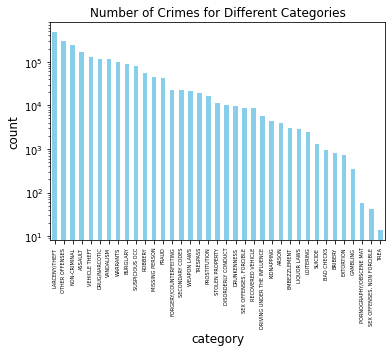

In [0]:
crimes_pd_df = q1_df.toPandas()
# display(crimes_pd_df)

plt.figure()
# plt.rcParams['xtick.bottom'] = plt.rcParams['xtick.labelbottom'] = True
# plt.rcParams['xtick.top'] = plt.rcParams['xtick.labeltop'] = False
ax = crimes_pd_df.plot(kind = 'bar', x = 'category', y = 'count', logy = True, color = 'skyblue', legend = False, align = 'center')
ax.set_ylabel('count', fontsize = 12)
ax.set_xlabel('category', fontsize = 12)
plt.xticks(fontsize = 5, rotation = 90)
plt.title('Number of Crimes for Different Categories')
display()

The top 3 most criminal types in SF crime report are: Larceny/Theft, Other Offenses, and Assult, and Non-criminal is ranked as 3rd in total. The least 3 criminal types happending in SF are: Trea, Sex Offenses, and Pornography/Obsence MAT.

### Counts the number of crimes for different district, and visualize your results

In [0]:
q2_sql = spark.sql("SELECT PdDistrict, COUNT(*) AS COUNT FROM sf_crime GROUP BY 1 ORDER BY 2 DESC") 
display(q2_sql) 

PdDistrict COUNT SOUTHERN 390692 MISSION 288985 NORTHERN 266435 CENTRAL 221923 BAYVIEW 205480 TENDERLOIN 186954 INGLESIDE 181092 TARAVAL 155461 PARK 119698 RICHMOND 112804 NA 1

In [0]:
q2_df = df_opt1.groupBy('PdDistrict').count().orderBy('count', ascending = False) 
display(q2_df) 

PdDistrict count SOUTHERN 390692 MISSION 288985 NORTHERN 266435 CENTRAL 221923 BAYVIEW 205480 TENDERLOIN 186954 INGLESIDE 181092 TARAVAL 155461 PARK 119698 RICHMOND 112804 NA 1

<Figure size 432x288 with 0 Axes>

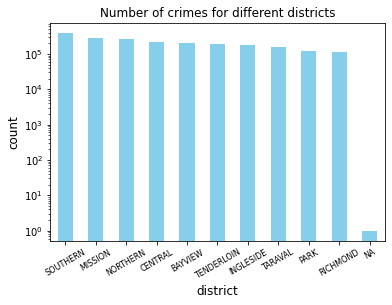

In [0]:
crimes_dis_pd_df = q2_sql.toPandas()
# display(crimes_dis_pd_df)

plt.figure()
# plt.rcParams['xtick.bottom'] = plt.rcParams['xtick.labelbottom'] = True
# plt.rcParams['xtick.top'] = plt.rcParams['xtick.labeltop'] = False
ax = crimes_dis_pd_df.plot(kind = 'bar',x = 'PdDistrict',y = 'COUNT',logy= True,color = 'skyblue',legend = False, align = 'center')
ax.set_ylabel('count',fontsize = 12)
ax.set_xlabel('district',fontsize = 12)
plt.xticks(fontsize = 8, rotation = 30)
plt.title('Number of crimes for different districts')
display()

The top 3 disctricts which have most crimes are: Southern, Mission, and Northern districts. The district which has least crimes reported is Richmond.

### Count the number of crimes each "Sunday" at "SF downtown".

In [0]:
q3_sql = spark.sql("""
                      with Sunday_dt_crime AS(
                      SELECT substring(Date, 1, 5) AS Date,
                             substring(Date, 7) AS Year
                      FROM sf_crime
                      WHERE (DayOfWeek = 'Sunday'
                             AND -122.423671 < X
                             AND X < 122.412497
                             AND 37.773510 < Y
                             AND Y < 37.782137)
                             )
                             
                      SELECT Year, Date, COUNT(*) AS COUNT
                      FROM Sunday_dt_crime
                      GROUP BY Year, Date
                      ORDER BY Year, Date
                      """)
display(q3_sql)

Year Date COUNT 2003 01/05 28 2003 01/12 33 2003 01/19 19 2003 01/26 32 2003 02/02 44 2003 02/09 46 2003 02/16 50 2003 02/23 48 2003 03/02 40 2003 03/09 49 2003 03/16 43 2003 03/23 32 2003 03/30 45 2003 04/06 41 2003 04/13 44 2003 04/20 42 2003 04/27 43 2003 05/04 33 2003 05/11 30 2003 05/18 49 2003 05/25 39 2003 06/01 75 2003 06/08 37 2003 06/15 41 2003 06/22 38 2003 06/29 65 2003 07/06 36 2003 07/13 47 2003 07/20 48 2003 07/27 34 2003 08/03 39 2003 08/10 42 2003 08/17 26 2003 08/24 40 2003 08/31 38 2003 09/07 41 2003 09/14 38 2003 09/21 44 2003 09/28 39 2003 10/05 37 2003 10/12 39 2003 10/19 37 2003 10/26 29 2003 11/02 30 2003 11/09 44 2003 11/16 36 2003 11/23 35 2003 11/30 35 2003 12/07 39 2003 12/14 22 2003 12/21 43 2003 12/28 31 2004 01/04 49 2004 01/11 28 2004 01/18 24 2004 01/25 46 2004 02/01 39 2004 02/08 42 2004 02/15 50 2004 02/22 35 2004 02/29 48 2004 03/07 33 2004 03/14 50 2004 03/21 31 2004 03/28 37 2004 04/04 38 2004 04/11 48 2004 04/18 46 2004 04/25 47 2004 05/02 47 2004 05/09 30 2004 05/16 40 2004 05/23 33 2004 05/30 49 2004 06/06 17 2004 06/13 38 2004 06/20 53 2004 06/27 64 2004 07/04 50 2004 07/11 39 2004 07/18 45 2004 07/25 43 2004 08/01 58 2004 08/08 39 2004 08/15 39 2004 08/22 47 2004 08/29 43 2004 09/05 40 2004 09/12 42 2004 09/19 27 2004 09/26 45 2004 10/03 23 2004 10/10 38 2004 10/17 39 2004 10/24 47 2004 10/31 43 2004 11/07 37 2004 11/14 35 2004 11/21 33 2004 11/28 41 2004 12/05 38 2004 12/12 40 2004 12/19 41 2004 12/26 23 2005 01/02 29 2005 01/09 26 2005 01/16 40 2005 01/23 46 2005 01/30 50 2005 02/06 38 2005 02/13 36 2005 02/20 38 2005 02/27 35 2005 03/06 35 2005 03/13 49 2005 03/20 51 2005 03/27 25 2005 04/03 37 2005 04/10 51 2005 04/17 33 2005 04/24 39 2005 05/01 52 2005 05/08 69 2005 05/15 41 2005 05/22 49 2005 05/29 47 2005 06/05 34 2005 06/12 37 2005 06/19 46 2005 06/26 64 2005 07/03 44 2005 07/10 43 2005 07/17 42 2005 07/24 34 2005 07/31 41 2005 08/07 50 2005 08/14 48 2005 08/21 49 2005 08/28 35 2005 09/04 34 2005 09/11 34 2005 09/18 40 2005 09/25 50 2005 10/02 38 2005 10/09 34 2005 10/16 40 2005 10/23 24 2005 10/30 32 2005 11/06 49 2005 11/13 50 2005 11/20 42 2005 11/27 34 2005 12/04 42 2005 12/11 38 2005 12/18 31 2005 12/25 23 2006 01/01 77 2006 01/08 50 2006 01/15 48 2006 01/22 48 2006 01/29 44 2006 02/05 38 2006 02/12 41 2006 02/19 54 2006 02/26 40 2006 03/05 50 2006 03/12 34 2006 03/19 56 2006 03/26 52 2006 04/02 45 2006 04/09 38 2006 04/16 36 2006 04/23 50 2006 04/30 44 2006 05/07 53 2006 05/14 46 2006 05/21 48 2006 05/28 49 2006 06/04 39 2006 06/11 43 2006 06/18 51 2006 06/25 41 2006 07/02 35 2006 07/09 40 2006 07/16 41 2006 07/23 43 2006 07/30 50 2006 08/06 49 2006 08/13 47 2006 08/20 36 2006 08/27 48 2006 09/03 27 2006 09/10 54 2006 09/17 48 2006 09/24 51 2006 10/01 47 2006 10/08 57 2006 10/15 42 2006 10/22 41 2006 10/29 51 2006 11/05 34 2006 11/12 35 2006 11/19 44 2006 11/26 38 2006 12/03 52 2006 12/10 36 2006 12/17 36 2006 12/24 27 2006 12/31 53 2007 01/07 52 2007 01/14 33 2007 01/21 41 2007 01/28 42 2007 02/04 48 2007 02/11 42 2007 02/18 46 2007 02/25 48 2007 03/04 58 2007 03/11 41 2007 03/18 44 2007 03/25 47 2007 04/01 57 2007 04/08 40 2007 04/15 41 2007 04/22 64 2007 04/29 33 2007 05/06 68 2007 05/13 41 2007 05/20 60 2007 05/27 43 2007 06/03 43 2007 06/10 41 2007 06/17 33 2007 06/24 61 2007 07/01 53 2007 07/08 57 2007 07/15 58 2007 07/22 42 2007 07/29 57 2007 08/05 41 2007 08/12 60 2007 08/19 58 2007 08/26 52 2007 09/02 31 2007 09/09 58 2007 09/16 52 2007 09/23 46 2007 09/30 70 2007 10/07 56 2007 10/14 51 2007 10/21 45 2007 10/28 51 2007 11/04 44 2007 11/11 40 2007 11/18 43 2007 11/25 40 2007 12/02 47 2007 12/09 44 2007 12/23 48 2007 12/30 39 2008 01/06 43 2008 01/13 47 2008 01/20 30 2008 01/27 39 2008 02/03 36 2008 02/10 36 2008 02/17 31 2008 02/24 43 2008 03/02 64 2008 03/09 44 2008 03/16 49 2008 03/23 39 2008 03/30 44 2008 04/06 38 2008 04/13 48 2008 04/20 40 2008 04/27 37 2008 05/04 44 2008 05/11 39 2008 05/18 44 2008 05/25 45 2008 06/01 75 2008 06/08 56 2008 06/15 53 2008 06/

In [0]:
df_opt2 = df_opt1[['IncidntNum', 'Category', 'Descript', 'DayOfWeek', 'Date', 'Time', 'PdDistrict', 'Resolution', 'Address', 'X', 'Y', 'Location']]
display(df_opt2)
df_opt2.createOrReplaceTempView("sf_crime")

IncidntNum Category Descript DayOfWeek Date Time PdDistrict Resolution Address X Y Location 031147516 LARCENY/THEFT PETTY THEFT FROM A BUILDING Sunday 09/28/2003 10:00 SOUTHERN NONE 1ST ST / BRANNAN ST -120.5 90 POINT (-120.50000000000001 90) 050697011 ASSAULT BATTERY Wednesday 06/22/2005 12:20 NORTHERN NONE 1200 Block of EDDY ST -122.428223303176 37.7818959488603 POINT (-122.42822330317601 37.7818959488603) 060747292 ASSAULT ASSAULT Saturday 07/15/2006 00:55 CENTRAL NONE 1600 Block of POWELL ST -122.410672425337 37.799788690123 POINT (-122.41067242533701 37.799788690123) 071035363 ASSAULT STALKING Tuesday 09/25/2007 00:01 TARAVAL NONE 400 Block of ULLOA ST -122.458226300605 37.7413616001449 POINT (-122.458226300605 37.7413616001449) 110824152 MISSING PERSON MISSING ADULT Saturday 09/24/2011 11:00 TARAVAL LOCATED 3200 Block of SAN JOSE AV -122.459172646607 37.7082001648459 POINT (-122.459172646607 37.7082001648459) 040378011 ASSAULT BATTERY Friday 12/12/2003 12:00 SOUTHERN NONE 500 Block of I-80 -122.386667033903 37.7898821569191 POINT (-122.38666703390301 37.7898821569191) 041476690 VEHICLE THEFT STOLEN TRUCK Thursday 12/30/2004 19:00 BAYVIEW NONE 100 Block of KAREN CT -122.407531316146 37.723291086507 POINT (-122.40753131614602 37.723291086507) 180308001 SUSPICIOUS OCC SUSPICIOUS OCCURRENCE Wednesday 04/25/2018 05:00 BAYVIEW NONE 1400 Block of THOMAS AV -122.38854283127222 37.72878928885484 POINT (-122.38854283127222 37.72878928885484) 180232165 ASSAULT FALSE IMPRISONMENT Saturday 03/24/2018 07:00 MISSION NONE MISSION ST / 20TH ST -122.41905269434928 37.75863240515618 POINT (-122.41905269434928 37.75863240515618) 160285162 NON-CRIMINAL LOST PROPERTY Tuesday 03/01/2016 00:01 MISSION NONE 2200 Block of MARKET ST -122.43195768519577 37.76493571896795 POINT (-122.43195768519577 37.76493571896795) 171034934 OTHER OFFENSES MISCELLANEOUS INVESTIGATION Friday 12/22/2017 23:30 NORTHERN NONE 800 Block of FELL ST -122.4318568343798 37.77484995474678 POINT (-122.4318568343798 37.77484995474678) 176096519 LARCENY/THEFT PETTY THEFT OF PROPERTY Saturday 04/15/2017 00:45 NORTHERN NONE 1900 Block of LOMBARD ST -122.43362219642138 37.800270294430966 POINT (-122.43362219642138 37.800270294430966) 170673353 NON-CRIMINAL LOST PROPERTY Wednesday 07/19/2017 12:00 MISSION NONE MISSION ST / 16TH ST -122.41967178029562 37.76505012146682 POINT (-122.41967178029562 37.76505012146682) 170060590 OTHER OFFENSES RESISTING ARREST Sunday 01/22/2017 17:57 RICHMOND ARREST, BOOKED CLEMENT ST / 17TH AV -122.47630696110282 37.782403326398246 POINT (-122.47630696110282 37.782403326398246) 170836238 NON-CRIMINAL AIDED CASE, MENTAL DISTURBED Friday 10/13/2017 06:45 TENDERLOIN NONE 600 Block of ELLIS ST -122.41689371073893 37.784286048038915 POINT (-122.41689371073893 37.784286048038915) 180298866 LARCENY/THEFT PETTY THEFT FROM LOCKED AUTO Sunday 04/22/2018 18:00 NORTHERN NONE 600 Block of VANNESS AV -122.4206913866642 37.781483252353745 POINT (-122.4206913866642 37.781483252353745) 166192876 LARCENY/THEFT PETTY THEFT BICYCLE Tuesday 08/09/2016 19:00 SOUTHERN NONE MARKET ST / 2ND ST -122.40137806754392 37.78926393104578 POINT (-122.40137806754392 37.78926393104578) 166249687 LARCENY/THEFT PETTY THEFT OF PROPERTY Sunday 08/21/2016 10:00 NORTHERN NONE 800 Block of LARKIN ST -122.41788544104195 37.785437847196754 POINT (-122.41788544104195 37.785437847196754) 180299375 ASSAULT THREATS AGAINST LIFE Sunday 04/22/2018 22:25 NORTHERN ARREST, BOOKED 1300 Block of FILLMORE ST -122.43235564136246 37.78190654767414 POINT (-122.43235564136246 37.78190654767414) 180216589 ASSAULT BATTERY Friday 03/23/2018 00:55 INGLESIDE ARREST, BOOKED SAN JOSE AV / 29TH ST -122.42267219236795 37.74394327043075 POINT (-122.42267219236795 37.74394327043075) 160162980 LARCENY/THEFT PETTY THEFT SHOPLIFTING Wednesday 02/24/2016 12:36 SOUTHERN ARREST, BOOKED 800 Block of MARKET ST -122.4065209871443 37.785062942166064 POINT (-122.4065209871443 37.785062942166064) 170747629 VANDALISM MALICIOUS MISCHIEF

In [0]:
from pyspark.sql.functions import hour, date_format, to_date, month, year

# add new columns to convert Date to date format
df_new = df_opt2.withColumn("IncidentDate", to_date(df_opt2.Date, "MM/dd/yyyy"))
# extract month and year from incident date
df_new = df_new.withColumn("Month", month(df_new["IncidentDate"]))
df_new = df_new.withColumn("Year", year(df_new["IncidentDate"]))
display(df_new)

IncidntNum Category Descript DayOfWeek Date Time PdDistrict Resolution Address X Y Location IncidentDate Month Year 031147516 LARCENY/THEFT PETTY THEFT FROM A BUILDING Sunday 09/28/2003 10:00 SOUTHERN NONE 1ST ST / BRANNAN ST -120.5 90 POINT (-120.50000000000001 90) 2003-09-28 9 2003 050697011 ASSAULT BATTERY Wednesday 06/22/2005 12:20 NORTHERN NONE 1200 Block of EDDY ST -122.428223303176 37.7818959488603 POINT (-122.42822330317601 37.7818959488603) 2005-06-22 6 2005 060747292 ASSAULT ASSAULT Saturday 07/15/2006 00:55 CENTRAL NONE 1600 Block of POWELL ST -122.410672425337 37.799788690123 POINT (-122.41067242533701 37.799788690123) 2006-07-15 7 2006 071035363 ASSAULT STALKING Tuesday 09/25/2007 00:01 TARAVAL NONE 400 Block of ULLOA ST -122.458226300605 37.7413616001449 POINT (-122.458226300605 37.7413616001449) 2007-09-25 9 2007 110824152 MISSING PERSON MISSING ADULT Saturday 09/24/2011 11:00 TARAVAL LOCATED 3200 Block of SAN JOSE AV -122.459172646607 37.7082001648459 POINT (-122.459172646607 37.7082001648459) 2011-09-24 9 2011 040378011 ASSAULT BATTERY Friday 12/12/2003 12:00 SOUTHERN NONE 500 Block of I-80 -122.386667033903 37.7898821569191 POINT (-122.38666703390301 37.7898821569191) 2003-12-12 12 2003 041476690 VEHICLE THEFT STOLEN TRUCK Thursday 12/30/2004 19:00 BAYVIEW NONE 100 Block of KAREN CT -122.407531316146 37.723291086507 POINT (-122.40753131614602 37.723291086507) 2004-12-30 12 2004 180308001 SUSPICIOUS OCC SUSPICIOUS OCCURRENCE Wednesday 04/25/2018 05:00 BAYVIEW NONE 1400 Block of THOMAS AV -122.38854283127222 37.72878928885484 POINT (-122.38854283127222 37.72878928885484) 2018-04-25 4 2018 180232165 ASSAULT FALSE IMPRISONMENT Saturday 03/24/2018 07:00 MISSION NONE MISSION ST / 20TH ST -122.41905269434928 37.75863240515618 POINT (-122.41905269434928 37.75863240515618) 2018-03-24 3 2018 160285162 NON-CRIMINAL LOST PROPERTY Tuesday 03/01/2016 00:01 MISSION NONE 2200 Block of MARKET ST -122.43195768519577 37.76493571896795 POINT (-122.43195768519577 37.76493571896795) 2016-03-01 3 2016 171034934 OTHER OFFENSES MISCELLANEOUS INVESTIGATION Friday 12/22/2017 23:30 NORTHERN NONE 800 Block of FELL ST -122.4318568343798 37.77484995474678 POINT (-122.4318568343798 37.77484995474678) 2017-12-22 12 2017 176096519 LARCENY/THEFT PETTY THEFT OF PROPERTY Saturday 04/15/2017 00:45 NORTHERN NONE 1900 Block of LOMBARD ST -122.43362219642138 37.800270294430966 POINT (-122.43362219642138 37.800270294430966) 2017-04-15 4 2017 170673353 NON-CRIMINAL LOST PROPERTY Wednesday 07/19/2017 12:00 MISSION NONE MISSION ST / 16TH ST -122.41967178029562 37.76505012146682 POINT (-122.41967178029562 37.76505012146682) 2017-07-19 7 2017 170060590 OTHER OFFENSES RESISTING ARREST Sunday 01/22/2017 17:57 RICHMOND ARREST, BOOKED CLEMENT ST / 17TH AV -122.47630696110282 37.782403326398246 POINT (-122.47630696110282 37.782403326398246) 2017-01-22 1 2017 170836238 NON-CRIMINAL AIDED CASE, MENTAL DISTURBED Friday 10/13/2017 06:45 TENDERLOIN NONE 600 Block of ELLIS ST -122.41689371073893 37.784286048038915 POINT (-122.41689371073893 37.784286048038915) 2017-10-13 10 2017 180298866 LARCENY/THEFT PETTY THEFT FROM LOCKED AUTO Sunday 04/22/2018 18:00 NORTHERN NONE 600 Block of VANNESS AV -122.4206913866642 37.781483252353745 POINT (-122.4206913866642 37.781483252353745) 2018-04-22 4 2018 166192876 LARCENY/THEFT PETTY THEFT BICYCLE Tuesday 08/09/2016 19:00 SOUTHERN NONE MARKET ST / 2ND ST -122.40137806754392 37.78926393104578 POINT (-122.40137806754392 37.78926393104578) 2016-08-09 8 2016 166249687 LARCENY/THEFT PETTY THEFT OF PROPERTY Sunday 08/21/2016 10:00 NORTHERN NONE 800 Block of LARKIN ST -122.41788544104195 37.785437847196754 POINT (-122.41788544104195 37.785437847196754) 2016-08-21 8 2016 180299375 ASSAULT THREATS AGAINST LIFE Sunday 04/22/2018 22:25 NORTHERN ARREST, BOOKED 1300 Block of FILLMORE ST -122.43235564136246 37.78190654767414 POINT (-122.43235564136246 37.78190654767414) 2018-04-22 4 2018 180216589 ASSAULT BATTERY Friday 03/23/2018 00:55 INGLE

In [0]:
sf_dt = (df_new.X > -122.4313) & (df_new.X < -122.4213) & (df_new.Y < 37.7740) & (df_new.Y > 37.7540 )
q3_df = df_new.filter((df_new.DayOfWeek == "Sunday") & (sf_dt)).groupBy("IncidentDate", "DayOfWeek").count().orderBy("IncidentDate")
display(q3_df)

IncidentDate DayOfWeek count 2003-01-05 Sunday 13 2003-01-12 Sunday 20 2003-01-19 Sunday 17 2003-01-26 Sunday 13 2003-02-02 Sunday 14 2003-02-09 Sunday 22 2003-02-16 Sunday 12 2003-02-23 Sunday 14 2003-03-02 Sunday 16 2003-03-09 Sunday 8 2003-03-16 Sunday 18 2003-03-23 Sunday 9 2003-03-30 Sunday 20 2003-04-06 Sunday 8 2003-04-13 Sunday 13 2003-04-20 Sunday 13 2003-04-27 Sunday 5 2003-05-04 Sunday 9 2003-05-11 Sunday 5 2003-05-18 Sunday 16 2003-05-25 Sunday 10 2003-06-01 Sunday 11 2003-06-08 Sunday 25 2003-06-15 Sunday 6 2003-06-22 Sunday 6 2003-06-29 Sunday 16 2003-07-06 Sunday 10 2003-07-13 Sunday 17 2003-07-20 Sunday 17 2003-07-27 Sunday 8 2003-08-03 Sunday 6 2003-08-10 Sunday 5 2003-08-17 Sunday 11 2003-08-24 Sunday 10 2003-08-31 Sunday 8 2003-09-07 Sunday 13 2003-09-14 Sunday 10 2003-09-21 Sunday 10 2003-09-28 Sunday 7 2003-10-05 Sunday 14 2003-10-12 Sunday 13 2003-10-19 Sunday 11 2003-10-26 Sunday 16 2003-11-02 Sunday 17 2003-11-09 Sunday 16 2003-11-16 Sunday 10 2003-11-23 Sunday 14 2003-11-30 Sunday 6 2003-12-07 Sunday 4 2003-12-14 Sunday 10 2003-12-21 Sunday 12 2003-12-28 Sunday 11 2004-01-04 Sunday 14 2004-01-11 Sunday 15 2004-01-18 Sunday 6 2004-01-25 Sunday 22 2004-02-01 Sunday 16 2004-02-08 Sunday 20 2004-02-15 Sunday 11 2004-02-22 Sunday 18 2004-02-29 Sunday 11 2004-03-07 Sunday 16 2004-03-14 Sunday 8 2004-03-21 Sunday 8 2004-03-28 Sunday 12 2004-04-04 Sunday 13 2004-04-11 Sunday 15 2004-04-18 Sunday 10 2004-04-25 Sunday 11 2004-05-02 Sunday 12 2004-05-09 Sunday 16 2004-05-16 Sunday 22 2004-05-23 Sunday 5 2004-05-30 Sunday 15 2004-06-06 Sunday 16 2004-06-13 Sunday 10 2004-06-20 Sunday 10 2004-06-27 Sunday 11 2004-07-04 Sunday 10 2004-07-11 Sunday 11 2004-07-18 Sunday 18 2004-07-25 Sunday 11 2004-08-01 Sunday 16 2004-08-08 Sunday 13 2004-08-15 Sunday 8 2004-08-22 Sunday 12 2004-08-29 Sunday 22 2004-09-05 Sunday 15 2004-09-12 Sunday 9 2004-09-19 Sunday 21 2004-09-26 Sunday 14 2004-10-03 Sunday 13 2004-10-10 Sunday 18 2004-10-17 Sunday 15 2004-10-24 Sunday 19 2004-10-31 Sunday 31 2004-11-07 Sunday 14 2004-11-14 Sunday 18 2004-11-21 Sunday 10 2004-11-28 Sunday 8 2004-12-05 Sunday 9 2004-12-12 Sunday 10 2004-12-19 Sunday 12 2004-12-26 Sunday 7 2005-01-02 Sunday 8 2005-01-09 Sunday 16 2005-01-16 Sunday 8 2005-01-23 Sunday 10 2005-01-30 Sunday 10 2005-02-06 Sunday 10 2005-02-13 Sunday 7 2005-02-20 Sunday 14 2005-02-27 Sunday 10 2005-03-06 Sunday 14 2005-03-13 Sunday 13 2005-03-20 Sunday 8 2005-03-27 Sunday 6 2005-04-03 Sunday 18 2005-04-10 Sunday 16 2005-04-17 Sunday 4 2005-04-24 Sunday 11 2005-05-01 Sunday 11 2005-05-08 Sunday 12 2005-05-15 Sunday 7 2005-05-22 Sunday 6 2005-05-29 Sunday 10 2005-06-05 Sunday 9 2005-06-12 Sunday 10 2005-06-19 Sunday 12 2005-06-26 Sunday 18 2005-07-03 Sunday 12 2005-07-10 Sunday 14 2005-07-17 Sunday 9 2005-07-24 Sunday 13 2005-07-31 Sunday 10 2005-08-07 Sunday 10 2005-08-14 Sunday 3 2005-08-21 Sunday 11 2005-08-28 Sunday 13 2005-09-04 Sunday 9 2005-09-11 Sunday 8 2005-09-18 Sunday 5 2005-09-25 Sunday 19 2005-10-02 Sunday 16 2005-10-09 Sunday 25 2005-10-16 Sunday 7 2005-10-23 Sunday 9 2005-10-30 Sunday 9 2005-11-06 Sunday 8 2005-11-13 Sunday 11 2005-11-20 Sunday 16 2005-11-27 Sunday 13 2005-12-04 Sunday 16 2005-12-11 Sunday 6 2005-12-18 Sunday 7 2005-12-25 Sunday 15 2006-01-01 Sunday 20 2006-01-08 Sunday 14 2006-01-15 Sunday 4 2006-01-22 Sunday 11 2006-01-29 Sunday 13 2006-02-05 Sunday 11 2006-02-12 Sunday 11 2006-02-19 Sunday 20 2006-02-26 Sunday 9 2006-03-05 Sunday 7 2006-03-12 Sunday 6 2006-03-19 Sunday 13 2006-03-26 Sunday 10 2006-04-02 Sunday 16 2006-04-09 Sunday 14 2006-04-16 Sunday 7 2006-04-23 Sunday 12 2006-04-30 Sunday 12 2006-05-07 Sunday 7 2006-05-14 Sunday 14 2006-05-21 Sunday 18 2006-05-28 Sunday 13 2006-06-04 Sunday 9 2006-06-11 Sunday 9 2006-06-18 Sunday 10 2006-06-25 Sunday 18 2006-07-02 Sunday 20 2006-07-09 Sunday 12 2006-07-16 Sunday 22 2006-07-23 Sunday 15 2006-07-30 Sunday 26 2006-08-06 Sunday 6 2006-08-13 Sunday 21 2006-08-20 Sunday 16 2006-08-27 Sunday 16 2006-09-03 Su

### Analysis the number of crime in each month of 2015, 2016, 2017, 2018. Then, give insights for the output results. What is the business impact for the result?

In [0]:
q4_sql = spark.sql("""
                   SELECT SUBSTRING(Date, 1, 2) AS Month, SUBSTRING(Date, 7, 4) AS Year, COUNT(*) AS COUNT 
                   FROM sf_crime 
                   GROUP BY Year, Month 
                   HAVING Year IN (2015, 2016, 2017, 2018) 
                   ORDER BY Year, Month
""")
display(q4_sql)


Month Year COUNT 01 2015 13181 02 2015 11882 03 2015 13463 04 2015 12526 05 2015 13318 06 2015 12853 07 2015 12949 08 2015 13317 09 2015 12476 10 2015 12697 11 2015 11691 12 2015 11106 01 2016 12532 02 2016 11743 03 2016 11950 04 2016 11905 05 2016 12313 06 2016 11727 07 2016 11832 08 2016 12104 09 2016 12092 10 2016 12913 11 2016 12254 12 2016 12629 01 2017 12687 02 2017 11780 03 2017 13250 04 2017 12452 05 2017 12758 06 2017 12186 07 2017 12717 08 2017 12428 09 2017 12204 10 2017 12970 11 2017 11940 12 2017 12115 01 2018 11667 02 2018 9565 03 2018 10354 04 2018 9954 05 2018 3519

In [0]:
years = [2015, 2016, 2017, 2018]
df_years = df_new[df_new.Year.isin(years)]
# display(df_years)
q4_df = df_years.groupBy(["Year", "Month"]).count().orderBy("Year", "Month")
display(q4_df)

Year Month count 2015 1 13181 2015 2 11882 2015 3 13463 2015 4 12526 2015 5 13318 2015 6 12853 2015 7 12949 2015 8 13317 2015 9 12476 2015 10 12697 2015 11 11691 2015 12 11106 2016 1 12532 2016 2 11743 2016 3 11950 2016 4 11905 2016 5 12313 2016 6 11727 2016 7 11832 2016 8 12104 2016 9 12092 2016 10 12913 2016 11 12254 2016 12 12629 2017 1 12687 2017 2 11780 2017 3 13250 2017 4 12452 2017 5 12758 2017 6 12186 2017 7 12717 2017 8 12428 2017 9 12204 2017 10 12970 2017 11 11940 2017 12 12115 2018 1 11667 2018 2 9565 2018 3 10354 2018 4 9954 2018 5 3519

In [0]:
crimes_years_pd_df = q4_sql.toPandas()
#display(crimes_years_pd_df)

crimes_years_pd_df["Mon_yr"] = crimes_years_pd_df["Month"].astype(str) + "/" + crimes_years_pd_df["Year"]
display(crimes_years_pd_df)

Month Year COUNT Mon_yr 01 2015 13181 01/2015 02 2015 11882 02/2015 03 2015 13463 03/2015 04 2015 12526 04/2015 05 2015 13318 05/2015 06 2015 12853 06/2015 07 2015 12949 07/2015 08 2015 13317 08/2015 09 2015 12476 09/2015 10 2015 12697 10/2015 11 2015 11691 11/2015 12 2015 11106 12/2015 01 2016 12532 01/2016 02 2016 11743 02/2016 03 2016 11950 03/2016 04 2016 11905 04/2016 05 2016 12313 05/2016 06 2016 11727 06/2016 07 2016 11832 07/2016 08 2016 12104 08/2016 09 2016 12092 09/2016 10 2016 12913 10/2016 11 2016 12254 11/2016 12 2016 12629 12/2016 01 2017 12687 01/2017 02 2017 11780 02/2017 03 2017 13250 03/2017 04 2017 12452 04/2017 05 2017 12758 05/2017 06 2017 12186 06/2017 07 2017 12717 07/2017 08 2017 12428 08/2017 09 2017 12204 09/2017 10 2017 12970 10/2017 11 2017 11940 11/2017 12 2017 12115 12/2017 01 2018 11667 01/2018 02 2018 9565 02/2018 03 2018 10354 03/2018 04 2018 9954 04/2018 05 2018 3519 05/2018

<Figure size 432x288 with 0 Axes>

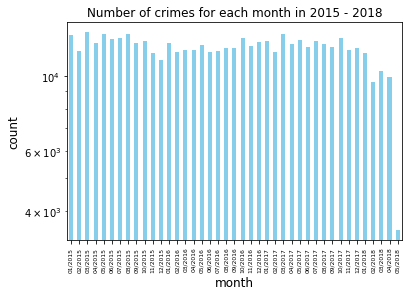

In [0]:
plt.figure()
# plt.rcParams['xtick.bottom'] = plt.rcParams['xtick.labelbottom'] = True
# plt.rcParams['xtick.top'] = plt.rcParams['xtick.labeltop'] = False
ax = crimes_years_pd_df.plot(kind = "bar", x = "Mon_yr", y = "COUNT", logy = True, color = "skyblue", legend = False, align = "center")
ax.set_ylabel("count", fontsize = 12)
ax.set_xlabel("month", fontsize = 12)
plt.xticks(fontsize = 6, rotation = 90)
plt.title('Number of crimes for each month in 2015 - 2018')
display()

It seems that the crime rate was decreasing in 2018 compared to 2015, 2016 and 2017.

### Analysis the number of crime with respsect to the hour in certian day like 2015/12/15, 2016/12/15, 2017/12/15. Then, give travel suggestion to visit SF.

In [0]:
# Show number of crime by hour for all records
q5_1 = spark.sql("""
                      SELECT SUBSTRING(Time, 1, 2) AS Hour,
                      COUNT(*) AS COUNT
                      FROM sf_crime
                      GROUP BY Hour
                      ORDER BY Hour
""")
display(q5_1)


Hour COUNT 00 108935 01 63344 02 52910 03 34580 04 24530 05 21769 06 32422 07 52359 08 78337 09 85640 10 91637 11 93552 12 127555 13 104097 14 107483 15 114582 16 120340 17 130152 18 135745 19 121905 20 110674 21 105539 22 110011 23 101427

In [0]:
q5_2 = spark.sql("""
                      SELECT SUBSTRING(Time, 1, 2) AS Hour,
                      COUNT(*) AS COUNT
                      FROM sf_crime
                      GROUP BY Hour
                      ORDER BY COUNT DESC
""")
display(q5_2)


Hour COUNT 18 135745 17 130152 12 127555 19 121905 16 120340 15 114582 20 110674 22 110011 00 108935 14 107483 21 105539 13 104097 23 101427 11 93552 10 91637 09 85640 08 78337 01 63344 02 52910 07 52359 03 34580 06 32422 04 24530 05 21769

In [0]:
# Show number of crime by hour for records in Christmas
q5_3 = spark.sql("""
                      SELECT SUBSTRING(Time, 1, 2) AS Hour,
                      COUNT(*) AS COUNT
                      FROM sf_crime
                      WHERE Date LIKE '12/25/%'
                      GROUP BY Hour
                      ORDER BY Hour
""")
display(q5_3)


Hour COUNT 00 208 01 133 02 106 03 78 04 59 05 49 06 54 07 62 08 110 09 82 10 135 11 138 12 220 13 137 14 131 15 167 16 159 17 146 18 169 19 164 20 150 21 174 22 175 23 196

In [0]:
q5_4 = spark.sql("""
                      SELECT SUBSTRING(Time, 1, 2) AS Hour,
                      COUNT(*) AS COUNT
                      FROM sf_crime
                      WHERE Date LIKE '12/25/%'
                      GROUP BY Hour
                      ORDER BY COUNT DESC
""")
display(q5_4)

Hour COUNT 12 220 00 208 23 196 22 175 21 174 18 169 15 167 19 164 16 159 20 150 17 146 11 138 13 137 10 135 01 133 14 131 08 110 02 106 09 82 03 78 07 62 04 59 06 54 05 49

In [0]:
# Show number of crime by hour for records in New Year Eve (12/31 - 01/01)
q5_5 = spark.sql("""
                      SELECT SUBSTRING(Time, 1, 2) as Hour,
                             SUBSTRING(Date, 1, 5) as Date_in_year,
                             COUNT(*) AS COUNT
                      FROM sf_crime
                      WHERE Date LIKE '12/31/%' OR Date LIKE '01/01/%'
                      GROUP BY Date_in_year, Hour
                      ORDER BY Date_in_year DESC, Hour
""")
display(q5_5)


Hour Date_in_year COUNT 00 12/31 277 01 12/31 160 02 12/31 137 03 12/31 70 04 12/31 55 05 12/31 59 06 12/31 72 07 12/31 98 08 12/31 177 09 12/31 171 10 12/31 208 11 12/31 278 12 12/31 333 13 12/31 228 14 12/31 256 15 12/31 257 16 12/31 300 17 12/31 301 18 12/31 291 19 12/31 288 20 12/31 270 21 12/31 355 22 12/31 415 23 12/31 555 00 01/01 1868 01 01/01 615 02 01/01 518 03 01/01 246 04 01/01 157 05 01/01 99 06 01/01 99 07 01/01 158 08 01/01 288 09 01/01 312 10 01/01 254 11 01/01 179 12 01/01 673 13 01/01 282 14 01/01 261 15 01/01 278 16 01/01 297 17 01/01 300 18 01/01 269 19 01/01 283 20 01/01 247 21 01/01 238 22 01/01 291 23 01/01 237

In [0]:
# Show number of crime by hour for records in certian day like 2015/12/15, 2016/12/15, 2017/12/15.
q5_6 = spark.sql("""
                      SELECT SUBSTRING(Time, 1, 2) as Hour,
                             SUBSTRING(Date, 1, 5) as Date_in_year,
                             COUNT(*) AS COUNT
                      FROM sf_crime
                      WHERE Date LIKE '12/15/%'
                      GROUP BY Date_in_year, Hour
                      ORDER BY Date_in_year DESC, Hour
""")
display(q5_6)

Hour Date_in_year COUNT 00 12/15 312 01 12/15 131 02 12/15 143 03 12/15 71 04 12/15 74 05 12/15 60 06 12/15 78 07 12/15 122 08 12/15 256 09 12/15 257 10 12/15 278 11 12/15 253 12 12/15 406 13 12/15 249 14 12/15 261 15 12/15 291 16 12/15 317 17 12/15 342 18 12/15 366 19 12/15 346 20 12/15 282 21 12/15 293 22 12/15 314 23 12/15 276

In [0]:
from pyspark.sql.functions import to_timestamp
df_new1 = df_new.withColumn('IncidentTime', to_timestamp(df_new['Time'], 'HH:mm')) 
df_new1 = df_new1.withColumn('Hour', hour(df_new1['IncidentTime']))
# display(df_new1.take(5))

dates = ['12/15/2015', '12/15/2016', '12/15/2017']
df_days = df_new1[df_new1.Date.isin(dates)]
q5_df = df_days.groupby('Hour', 'Date').count().orderBy('Date', 'Hour')
display(q5_df)

Hour Date count 0 12/15/2015 15 1 12/15/2015 6 2 12/15/2015 5 3 12/15/2015 4 4 12/15/2015 10 5 12/15/2015 3 6 12/15/2015 4 7 12/15/2015 8 8 12/15/2015 12 9 12/15/2015 10 10 12/15/2015 25 11 12/15/2015 15 12 12/15/2015 35 13 12/15/2015 13 14 12/15/2015 27 15 12/15/2015 14 16 12/15/2015 30 17 12/15/2015 18 18 12/15/2015 17 19 12/15/2015 26 20 12/15/2015 13 21 12/15/2015 13 22 12/15/2015 13 23 12/15/2015 10 0 12/15/2016 21 1 12/15/2016 9 2 12/15/2016 12 3 12/15/2016 9 4 12/15/2016 1 5 12/15/2016 6 6 12/15/2016 3 7 12/15/2016 3 8 12/15/2016 21 9 12/15/2016 23 10 12/15/2016 12 11 12/15/2016 17 12 12/15/2016 29 13 12/15/2016 17 14 12/15/2016 19 15 12/15/2016 13 16 12/15/2016 17 17 12/15/2016 19 18 12/15/2016 38 19 12/15/2016 30 20 12/15/2016 25 21 12/15/2016 15 22 12/15/2016 22 23 12/15/2016 15 0 12/15/2017 30 1 12/15/2017 12 2 12/15/2017 6 3 12/15/2017 4 4 12/15/2017 9 5 12/15/2017 2 6 12/15/2017 6 7 12/15/2017 11 8 12/15/2017 26 9 12/15/2017 14 10 12/15/2017 27 11 12/15/2017 26 12 12/15/2017 23 13 12/15/2017 10 14 12/15/2017 11 15 12/15/2017 26 16 12/15/2017 30 17 12/15/2017 27 18 12/15/2017 28 19 12/15/2017 29 20 12/15/2017 17 21 12/15/2017 20 22 12/15/2017 36 23 12/15/2017 28

<Figure size 432x288 with 0 Axes>

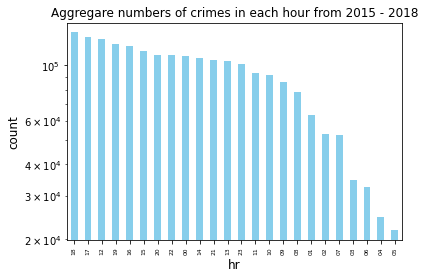

In [0]:
crimes_hr_pd_df_1 = q5_2.toPandas()

plt.figure()
# plt.rcParams['xtick.bottom'] = plt.rcParams['xtick.labelbottom'] = True
# plt.rcParams['xtick.top'] = plt.rcParams['xtick.labeltop'] = False
ax = crimes_hr_pd_df_1.plot(kind = "bar", x = "Hour", y = "COUNT", logy = True, color = "skyblue", legend = False, align = "center")
ax.set_ylabel("count", fontsize = 12)
ax.set_xlabel("hr", fontsize = 12)
plt.xticks(fontsize = 6, rotation = 90)
plt.title('Aggregare numbers of crimes in each hour from 2015 - 2018')
display()

In SF, most crimes happen at 12:00, 00:00, 23:00, 22:00 and 21:00. Travel Suggestion: Try to avoid this time period and stay at your hotel/Airbnb after 21:00.

###
### (1) Step 1: Find out the top-3 danger disrict  
### (2) Step 2: Find out the crime event w.r.t category and time (hour) from the result of step 1  
### (3) Give advice to distribute the police based on the analysis results.

In [0]:
# Step 1: Find out the top 3 danger districts
q6_sql_s1 = spark.sql("""
                    SELECT PdDistrict, COUNT(*) AS COUNT
                    FROM sf_crime
                    GROUP BY 1
                    ORDER BY 2 DESC
                    LIMIT 3
""")
display(q6_sql_s1)

PdDistrict COUNT SOUTHERN 390692 MISSION 288985 NORTHERN 266435

In [0]:
# Step 1: Find out the top 3 danger districts
q6_df_s1 = df_new.groupBy("PdDistrict").count().orderBy("COUNT", ascending = False)
# display(q6_df_s1)
top3_danger = df_new.groupBy("PdDistrict").count().orderBy("COUNT", ascending = False).head(3)
top3_danger_district = [top3_danger[i][0] for i in range(3)]
top3_danger_district

Out[32]: ['SOUTHERN', 'MISSION', 'NORTHERN']

In [0]:
# Step 2: Find out the crime event w.r.t category and time (hour) from the result of step 1
q6_df_s2 = df_new1.filter(df_new1.PdDistrict.isin("SOUTHERN", "MISSION", "NORTHERN")).groupBy("Category", "Hour").count().orderBy("Category", "Hour")
display(q6_df_s2)

Category Hour count ARSON 0 84 ARSON 1 77 ARSON 2 84 ARSON 3 95 ARSON 4 74 ARSON 5 60 ARSON 6 50 ARSON 7 28 ARSON 8 34 ARSON 9 28 ARSON 10 44 ARSON 11 29 ARSON 12 37 ARSON 13 35 ARSON 14 36 ARSON 15 49 ARSON 16 31 ARSON 17 48 ARSON 18 53 ARSON 19 59 ARSON 20 69 ARSON 21 55 ARSON 22 61 ARSON 23 72 ASSAULT 0 4120 ASSAULT 1 3940 ASSAULT 2 3510 ASSAULT 3 1622 ASSAULT 4 1017 ASSAULT 5 772 ASSAULT 6 1089 ASSAULT 7 1581 ASSAULT 8 2325 ASSAULT 9 2629 ASSAULT 10 2860 ASSAULT 11 3076 ASSAULT 12 3735 ASSAULT 13 3407 ASSAULT 14 3529 ASSAULT 15 3862 ASSAULT 16 3876 ASSAULT 17 3826 ASSAULT 18 3726 ASSAULT 19 3591 ASSAULT 20 3498 ASSAULT 21 3609 ASSAULT 22 3623 ASSAULT 23 3480 BAD CHECKS 0 79 BAD CHECKS 1 3 BAD CHECKS 2 2 BAD CHECKS 4 2 BAD CHECKS 5 1 BAD CHECKS 6 2 BAD CHECKS 7 3 BAD CHECKS 8 24 BAD CHECKS 9 26 BAD CHECKS 10 24 BAD CHECKS 11 15 BAD CHECKS 12 76 BAD CHECKS 13 15 BAD CHECKS 14 21 BAD CHECKS 15 31 BAD CHECKS 16 19 BAD CHECKS 17 25 BAD CHECKS 18 10 BAD CHECKS 19 11 BAD CHECKS 20 8 BAD CHECKS 21 4 BAD CHECKS 22 2 BAD CHECKS 23 3 BRIBERY 0 20 BRIBERY 1 11 BRIBERY 2 12 BRIBERY 3 6 BRIBERY 4 5 BRIBERY 5 2 BRIBERY 6 2 BRIBERY 7 4 BRIBERY 8 6 BRIBERY 9 11 BRIBERY 10 18 BRIBERY 11 17 BRIBERY 12 17 BRIBERY 13 11 BRIBERY 14 14 BRIBERY 15 10 BRIBERY 16 14 BRIBERY 17 25 BRIBERY 18 13 BRIBERY 19 17 BRIBERY 20 16 BRIBERY 21 20 BRIBERY 22 20 BRIBERY 23 15 BURGLARY 0 1585 BURGLARY 1 1064 BURGLARY 2 1152 BURGLARY 3 1229 BURGLARY 4 1032 BURGLARY 5 948 BURGLARY 6 858 BURGLARY 7 998 BURGLARY 8 1669 BURGLARY 9 1379 BURGLARY 10 1220 BURGLARY 11 1193 BURGLARY 12 1775 BURGLARY 13 1157 BURGLARY 14 1391 BURGLARY 15 1635 BURGLARY 16 1893 BURGLARY 17 2613 BURGLARY 18 2654 BURGLARY 19 2102 BURGLARY 20 1843 BURGLARY 21 1680 BURGLARY 22 1727 BURGLARY 23 1567 DISORDERLY CONDUCT 0 301 DISORDERLY CONDUCT 1 225 DISORDERLY CONDUCT 2 212 DISORDERLY CONDUCT 3 140 DISORDERLY CONDUCT 4 100 DISORDERLY CONDUCT 5 163 DISORDERLY CONDUCT 6 396 DISORDERLY CONDUCT 7 451 DISORDERLY CONDUCT 8 362 DISORDERLY CONDUCT 9 311 DISORDERLY CONDUCT 10 244 DISORDERLY CONDUCT 11 200 DISORDERLY CONDUCT 12 177 DISORDERLY CONDUCT 13 172 DISORDERLY CONDUCT 14 165 DISORDERLY CONDUCT 15 117 DISORDERLY CONDUCT 16 142 DISORDERLY CONDUCT 17 128 DISORDERLY CONDUCT 18 158 DISORDERLY CONDUCT 19 131 DISORDERLY CONDUCT 20 129 DISORDERLY CONDUCT 21 146 DISORDERLY CONDUCT 22 208 DISORDERLY CONDUCT 23 260 DRIVING UNDER THE INFLUENCE 0 272 DRIVING UNDER THE INFLUENCE 1 274 DRIVING UNDER THE INFLUENCE 2 263 DRIVING UNDER THE INFLUENCE 3 117 DRIVING UNDER THE INFLUENCE 4 40 DRIVING UNDER THE INFLUENCE 5 27 DRIVING UNDER THE INFLUENCE 6 27 DRIVING UNDER THE INFLUENCE 7 19 DRIVING UNDER THE INFLUENCE 8 18 DRIVING UNDER THE INFLUENCE 9 25 DRIVING UNDER THE INFLUENCE 10 11 DRIVING UNDER THE INFLUENCE 11 23 DRIVING UNDER THE INFLUENCE 12 33 DRIVING UNDER THE INFLUENCE 13 20 DRIVING UNDER THE INFLUENCE 14 27 DRIVING UNDER THE INFLUENCE 15 48 DRIVING UNDER THE INFLUENCE 16 62 DRIVING UNDER THE INFLUENCE 17 66 DRIVING UNDER THE INFLUENCE 18 81 DRIVING UNDER THE INFLUENCE 19 92 DRIVING UNDER THE INFLUENCE 20 119 DRIVING UNDER THE INFLUENCE 21 167 DRIVING UNDER THE INFLUENCE 22 194 DRIVING UNDER THE INFLUENCE 23 239 DRUG/NARCOTIC 0 1756 DRUG/NARCOTIC 1 1156 DRUG/NARCOTIC 2 947 DRUG/NARCOTIC 3 607 DRUG/NARCOTIC 4 444 DRUG/NARCOTIC 5 216 DRUG/NARCOTIC 6 678 DRUG/NARCOTIC 7 1439 DRUG/NARCOTIC 8 1845 DRUG/NARCOTIC 9 2178 DRUG/NARCOTIC 10 2403 DRUG/NARCOTIC 11 2578 DRUG/NARCOTIC 12 2582 DRUG/NARCOTIC 13 3131 DRUG/NARCOTIC 14 3435 DRUG/NARCOTIC 15 3177 DRUG/NARCOTIC 16 3275 DRUG/NARCOTIC 17 3588 DRUG/NARCOTIC 18 3269 DRUG/NARCOTIC 19 2921 DRUG/NARCOTIC 20 2157 DRUG/NARCOTIC 21 1937 DRUG/NARCOTIC 22 2380 DRUG/NARCOTIC 23 2178 DRUNKENNESS 0 400 DRUNKENNESS 1 369 DRUNKENNESS 2 294 DRUNKENNESS 3 128 DRUNKENNESS 4 55 DRUNKENNESS 5 20 DRUNKENNESS 6 31 DRUNKENNESS 7 79 DRUNKENNESS 8 78 DRUNKENNESS 9 98 DRUNKENNESS 10 100 DRUNKENNESS 11 145 DRUNKENNESS 12 119 DRUNKENNESS 13 146 DRUNKENNESS 14 129 DRUNKENNESS 15 160 DRUNKENNESS 1

There are two peaks at 12:00 and 18:00 and these are lunch time and dinner time. And note that the majority of criminal report at these two is Larceny/Theft. The Larcency/Theft crime rate reached a peak around 18:00 to 20:00.

### For different category of crime, find the percentage of resolution. Based on the output, give the hints to adjust the policy.

In [0]:
res_num = spark.sql("""
                    SELECT category, resolution, COUNT(*) AS N_res FROM sf_crime GROUP BY category, resolution
""")
res_num.createOrReplaceTempView("res_num")

cate_num = spark.sql("""
                     SELECT category, COUNT(*) AS N_cate FROM sf_crime GROUP BY category
""")
cate_num.createOrReplaceTempView("cate_num")

q7_result = spark.sql("""
                      SELECT DISTINCT sf_crime.category, sf_crime.resolution, N_res/N_cate AS Percentage
                      FROM (sf_crime LEFT JOIN res_num ON sf_crime.category = res_num.category AND sf_crime.resolution = res_num.resolution)
                      LEFT JOIN cate_num ON sf_crime.category = cate_num.category
                      ORDER BY category, resolution
""")
q7_result.createOrReplaceTempView("q7_result")


In [0]:
display(q7_result)

category resolution Percentage ARSON ARREST, BOOKED 0.1625806451612903 ARSON ARREST, CITED 0.004387096774193549 ARSON COMPLAINANT REFUSES TO PROSECUTE 7.741935483870968E-4 ARSON EXCEPTIONAL CLEARANCE 5.161290322580645E-4 ARSON NONE 0.8190967741935484 ARSON NOT PROSECUTED 7.741935483870968E-4 ARSON PROSECUTED BY OUTSIDE AGENCY 7.741935483870968E-4 ARSON PROSECUTED FOR LESSER OFFENSE 2.5806451612903227E-4 ARSON PSYCHOPATHIC CASE 0.004387096774193549 ARSON UNFOUNDED 0.0064516129032258064 ASSAULT ARREST, BOOKED 0.29481208318865915 ASSAULT ARREST, CITED 0.04206726452030028 ASSAULT COMPLAINANT REFUSES TO PROSECUTE 0.010757773494091306 ASSAULT DISTRICT ATTORNEY REFUSES TO PROSECUTE 0.012278349157696867 ASSAULT EXCEPTIONAL CLEARANCE 0.0037834796039319454 ASSAULT LOCATED 5.567462075406185E-4 ASSAULT NONE 0.6258485889776224 ASSAULT NOT PROSECUTED 8.141664970486464E-4 ASSAULT PROSECUTED BY OUTSIDE AGENCY 6.106248727864848E-4 ASSAULT PROSECUTED FOR LESSER OFFENSE 7.183822032782174E-5 ASSAULT PSYCHOPATHIC CASE 0.0024125668993426803 ASSAULT UNFOUNDED 0.005986518360651812 BAD CHECKS ARREST, BOOKED 0.05303030303030303 BAD CHECKS ARREST, CITED 0.0010822510822510823 BAD CHECKS COMPLAINANT REFUSES TO PROSECUTE 0.005411255411255411 BAD CHECKS DISTRICT ATTORNEY REFUSES TO PROSECUTE 0.015151515151515152 BAD CHECKS EXCEPTIONAL CLEARANCE 0.006493506493506494 BAD CHECKS NONE 0.8051948051948052 BAD CHECKS NOT PROSECUTED 0.048701298701298704 BAD CHECKS PROSECUTED BY OUTSIDE AGENCY 0.05194805194805195 BAD CHECKS UNFOUNDED 0.012987012987012988 BRIBERY ARREST, BOOKED 0.5251256281407035 BRIBERY ARREST, CITED 0.00628140703517588 BRIBERY COMPLAINANT REFUSES TO PROSECUTE 0.013819095477386936 BRIBERY DISTRICT ATTORNEY REFUSES TO PROSECUTE 0.018844221105527637 BRIBERY EXCEPTIONAL CLEARANCE 0.0037688442211055275 BRIBERY NONE 0.42462311557788945 BRIBERY NOT PROSECUTED 0.001256281407035176 BRIBERY UNFOUNDED 0.00628140703517588 BURGLARY ARREST, BOOKED 0.14017152206617106 BURGLARY ARREST, CITED 0.0016032152151712476 BURGLARY COMPLAINANT REFUSES TO PROSECUTE 0.0032723159871303545 BURGLARY DISTRICT ATTORNEY REFUSES TO PROSECUTE 0.004535122492230995 BURGLARY EXCEPTIONAL CLEARANCE 0.0014714441015955286 BURGLARY LOCATED 1.6471389196964873E-4 BURGLARY NONE 0.8417209307432989 BURGLARY NOT PROSECUTED 6.039509372220453E-4 BURGLARY PROSECUTED BY OUTSIDE AGENCY 3.513896362019173E-4 BURGLARY PROSECUTED FOR LESSER OFFENSE 2.196185226261983E-5 BURGLARY PSYCHOPATHIC CASE 9.882833518178923E-5 BURGLARY UNFOUNDED 0.005984604741563903 DISORDERLY CONDUCT ARREST, BOOKED 0.37273459524768426 DISORDERLY CONDUCT ARREST, CITED 0.26449859041482077 DISORDERLY CONDUCT COMPLAINANT REFUSES TO PROSECUTE 0.002819170358437374 DISORDERLY CONDUCT DISTRICT ATTORNEY REFUSES TO PROSECUTE 9.061619009262988E-4 DISORDERLY CONDUCT EXCEPTIONAL CLEARANCE 0.0010068465565847766 DISORDERLY CONDUCT LOCATED 6.041079339508659E-4 DISORDERLY CONDUCT NONE 0.3481675392670157 DISORDERLY CONDUCT NOT PROSECUTED 0.0011075312122432541 DISORDERLY CONDUCT PROSECUTED BY OUTSIDE AGENCY 2.013693113169553E-4 DISORDERLY CONDUCT PROSECUTED FOR LESSER OFFENSE 1.0068465565847765E-4 DISORDERLY CONDUCT PSYCHOPATHIC CASE 0.0018123238018525976 DISORDERLY CONDUCT UNFOUNDED 0.006041079339508659 DRIVING UNDER THE INFLUENCE ARREST, BOOKED 0.8742038216560509 DRIVING UNDER THE INFLUENCE ARREST, CITED 0.06723283793347487 DRIVING UNDER THE INFLUENCE EXCEPTIONAL CLEARANCE 5.307855626326964E-4 DRIVING UNDER THE INFLUENCE LOCATED 3.5385704175513094E-4 DRIVING UNDER THE INFLUENCE NONE 0.05608634111818825 DRIVING UNDER THE INFLUENCE PROSECUTED BY OUTSIDE AGENCY 1.7692852087756547E-4 DRIVING UNDER THE INFLUENCE PROSECUTED FOR LESSER OFFENSE 1.7692852087756547E-4 DRIVING UNDER THE INFLUENCE PSYCHOPATHIC CASE 1.7692852087756547E-4 DRIVING UNDER THE INFLUENCE UNFOUNDED 0.0010615711252653928 DRUG/NARCOTIC ARREST, BOOKED 0.8311421563218782 DRUG/NARCOTIC ARREST, CITED 0.07677748448918274 DRUG/NARCOTIC COMPLAINANT REFUSES TO PROSECUTE 4.1588511385915925E-4 DRU

In [0]:
# Percentage of resolution for LARCENY/THEFT
q7 = spark.sql("""
               SELECT Resolution, Percentage
               FROM q7_result
               WHERE category = 'LARCENY/THEFT'
               ORDER BY Percentage DESC
""")
display(q7)



Resolution Percentage NONE 0.9162131910664784 ARREST, BOOKED 0.052588524504419684 ARREST, CITED 0.021890266227313143 NOT PROSECUTED 0.0033474554108478475 UNFOUNDED 0.0025545269104032637 COMPLAINANT REFUSES TO PROSECUTE 9.854071865683352E-4 DISTRICT ATTORNEY REFUSES TO PROSECUTE 9.770385480412154E-4 EXCEPTIONAL CLEARANCE 9.247345572467179E-4 PROSECUTED BY OUTSIDE AGENCY 3.2637690255766513E-4 PSYCHOPATHIC CASE 9.833150269365553E-5 LOCATED 9.205502379831582E-5 PROSECUTED FOR LESSER OFFENSE 2.092159631779905E-6

In [0]:
# Percentage of resolution for BURGLARY
q7 = spark.sql("""
               SELECT Resolution, Percentage
               FROM q7_result
               WHERE category = 'BURGLARY'
               ORDER BY Percentage DESC
""")
display(q7)


Resolution Percentage NONE 0.8417209307432989 ARREST, BOOKED 0.14017152206617106 UNFOUNDED 0.005984604741563903 DISTRICT ATTORNEY REFUSES TO PROSECUTE 0.004535122492230995 COMPLAINANT REFUSES TO PROSECUTE 0.0032723159871303545 ARREST, CITED 0.0016032152151712476 EXCEPTIONAL CLEARANCE 0.0014714441015955286 NOT PROSECUTED 6.039509372220453E-4 PROSECUTED BY OUTSIDE AGENCY 3.513896362019173E-4 LOCATED 1.6471389196964873E-4 PSYCHOPATHIC CASE 9.882833518178923E-5 PROSECUTED FOR LESSER OFFENSE 2.196185226261983E-5

In [0]:
# Percentage of resolution for ASSAULT
q7 = spark.sql("""
               SELECT Resolution, Percentage
               FROM q7_result
               WHERE category = 'ASSAULT'
               ORDER BY Percentage DESC
""")
display(q7)


Resolution Percentage NONE 0.6258485889776224 ARREST, BOOKED 0.29481208318865915 ARREST, CITED 0.04206726452030028 DISTRICT ATTORNEY REFUSES TO PROSECUTE 0.012278349157696867 COMPLAINANT REFUSES TO PROSECUTE 0.010757773494091306 UNFOUNDED 0.005986518360651812 EXCEPTIONAL CLEARANCE 0.0037834796039319454 PSYCHOPATHIC CASE 0.0024125668993426803 NOT PROSECUTED 8.141664970486464E-4 PROSECUTED BY OUTSIDE AGENCY 6.106248727864848E-4 LOCATED 5.567462075406185E-4 PROSECUTED FOR LESSER OFFENSE 7.183822032782174E-5

In [0]:
q7_sql_1 = spark.sql("""
                  SELECT *, CASE WHEN Resolution == "NONE" THEN false ELSE true END AS IsResolution
                  FROM sf_crime
""")
q7_sql_1.createOrReplaceTempView("q7_sql_1")
display(q7_sql_1)

IncidntNum Category Descript DayOfWeek Date Time PdDistrict Resolution Address X Y Location IsResolution 031147516 LARCENY/THEFT PETTY THEFT FROM A BUILDING Sunday 09/28/2003 10:00 SOUTHERN NONE 1ST ST / BRANNAN ST -120.5 90 POINT (-120.50000000000001 90) false 050697011 ASSAULT BATTERY Wednesday 06/22/2005 12:20 NORTHERN NONE 1200 Block of EDDY ST -122.428223303176 37.7818959488603 POINT (-122.42822330317601 37.7818959488603) false 060747292 ASSAULT ASSAULT Saturday 07/15/2006 00:55 CENTRAL NONE 1600 Block of POWELL ST -122.410672425337 37.799788690123 POINT (-122.41067242533701 37.799788690123) false 071035363 ASSAULT STALKING Tuesday 09/25/2007 00:01 TARAVAL NONE 400 Block of ULLOA ST -122.458226300605 37.7413616001449 POINT (-122.458226300605 37.7413616001449) false 110824152 MISSING PERSON MISSING ADULT Saturday 09/24/2011 11:00 TARAVAL LOCATED 3200 Block of SAN JOSE AV -122.459172646607 37.7082001648459 POINT (-122.459172646607 37.7082001648459) true 040378011 ASSAULT BATTERY Friday 12/12/2003 12:00 SOUTHERN NONE 500 Block of I-80 -122.386667033903 37.7898821569191 POINT (-122.38666703390301 37.7898821569191) false 041476690 VEHICLE THEFT STOLEN TRUCK Thursday 12/30/2004 19:00 BAYVIEW NONE 100 Block of KAREN CT -122.407531316146 37.723291086507 POINT (-122.40753131614602 37.723291086507) false 180308001 SUSPICIOUS OCC SUSPICIOUS OCCURRENCE Wednesday 04/25/2018 05:00 BAYVIEW NONE 1400 Block of THOMAS AV -122.38854283127222 37.72878928885484 POINT (-122.38854283127222 37.72878928885484) false 180232165 ASSAULT FALSE IMPRISONMENT Saturday 03/24/2018 07:00 MISSION NONE MISSION ST / 20TH ST -122.41905269434928 37.75863240515618 POINT (-122.41905269434928 37.75863240515618) false 160285162 NON-CRIMINAL LOST PROPERTY Tuesday 03/01/2016 00:01 MISSION NONE 2200 Block of MARKET ST -122.43195768519577 37.76493571896795 POINT (-122.43195768519577 37.76493571896795) false 171034934 OTHER OFFENSES MISCELLANEOUS INVESTIGATION Friday 12/22/2017 23:30 NORTHERN NONE 800 Block of FELL ST -122.4318568343798 37.77484995474678 POINT (-122.4318568343798 37.77484995474678) false 176096519 LARCENY/THEFT PETTY THEFT OF PROPERTY Saturday 04/15/2017 00:45 NORTHERN NONE 1900 Block of LOMBARD ST -122.43362219642138 37.800270294430966 POINT (-122.43362219642138 37.800270294430966) false 170673353 NON-CRIMINAL LOST PROPERTY Wednesday 07/19/2017 12:00 MISSION NONE MISSION ST / 16TH ST -122.41967178029562 37.76505012146682 POINT (-122.41967178029562 37.76505012146682) false 170060590 OTHER OFFENSES RESISTING ARREST Sunday 01/22/2017 17:57 RICHMOND ARREST, BOOKED CLEMENT ST / 17TH AV -122.47630696110282 37.782403326398246 POINT (-122.47630696110282 37.782403326398246) true 170836238 NON-CRIMINAL AIDED CASE, MENTAL DISTURBED Friday 10/13/2017 06:45 TENDERLOIN NONE 600 Block of ELLIS ST -122.41689371073893 37.784286048038915 POINT (-122.41689371073893 37.784286048038915) false 180298866 LARCENY/THEFT PETTY THEFT FROM LOCKED AUTO Sunday 04/22/2018 18:00 NORTHERN NONE 600 Block of VANNESS AV -122.4206913866642 37.781483252353745 POINT (-122.4206913866642 37.781483252353745) false 166192876 LARCENY/THEFT PETTY THEFT BICYCLE Tuesday 08/09/2016 19:00 SOUTHERN NONE MARKET ST / 2ND ST -122.40137806754392 37.78926393104578 POINT (-122.40137806754392 37.78926393104578) false 166249687 LARCENY/THEFT PETTY THEFT OF PROPERTY Sunday 08/21/2016 10:00 NORTHERN NONE 800 Block of LARKIN ST -122.41788544104195 37.785437847196754 POINT (-122.41788544104195 37.785437847196754) false 180299375 ASSAULT THREATS AGAINST LIFE Sunday 04/22/2018 22:25 NORTHERN ARREST, BOOKED 1300 Block of FILLMORE ST -122.43235564136246 37.78190654767414 POINT (-122.43235564136246 37.78190654767414) true 180216589 ASSAULT BATTERY Friday 03/23/2018 00:55 INGLESIDE ARREST, BOOKED SAN JOSE AV / 29TH ST -122.42267219236795 37.74394327043075 POINT (-122.42267219236795 37.74394327043075) true 160162980 LARCENY/THEFT PETTY THEFT SHOPLIFTING Wednesday 02/24/2016 12:36 SOUTHERN ARREST, BOOKED 800 Block of MAR

In [0]:
q7_sql_2 = spark.sql("""
                  SELECT category, Resolution, IsResolution, COUNT(*) AS Resolved
                  FROM q7_sql_1
                  GROUP BY category, Resolution, IsResolution
                  ORDER BY category, Resolution
""")
q7_sql_2.createOrReplaceTempView("q7_sql_2")
display(q7_sql_2)

category Resolution IsResolution Resolved ARSON ARREST, BOOKED true 630 ARSON ARREST, CITED true 17 ARSON COMPLAINANT REFUSES TO PROSECUTE true 3 ARSON EXCEPTIONAL CLEARANCE true 2 ARSON NONE false 3174 ARSON NOT PROSECUTED true 3 ARSON PROSECUTED BY OUTSIDE AGENCY true 3 ARSON PROSECUTED FOR LESSER OFFENSE true 1 ARSON PSYCHOPATHIC CASE true 17 ARSON UNFOUNDED true 25 ASSAULT ARREST, BOOKED true 49246 ASSAULT ARREST, CITED true 7027 ASSAULT COMPLAINANT REFUSES TO PROSECUTE true 1797 ASSAULT DISTRICT ATTORNEY REFUSES TO PROSECUTE true 2051 ASSAULT EXCEPTIONAL CLEARANCE true 632 ASSAULT LOCATED true 93 ASSAULT NONE false 104543 ASSAULT NOT PROSECUTED true 136 ASSAULT PROSECUTED BY OUTSIDE AGENCY true 102 ASSAULT PROSECUTED FOR LESSER OFFENSE true 12 ASSAULT PSYCHOPATHIC CASE true 403 ASSAULT UNFOUNDED true 1000 BAD CHECKS ARREST, BOOKED true 49 BAD CHECKS ARREST, CITED true 1 BAD CHECKS COMPLAINANT REFUSES TO PROSECUTE true 5 BAD CHECKS DISTRICT ATTORNEY REFUSES TO PROSECUTE true 14 BAD CHECKS EXCEPTIONAL CLEARANCE true 6 BAD CHECKS NONE false 744 BAD CHECKS NOT PROSECUTED true 45 BAD CHECKS PROSECUTED BY OUTSIDE AGENCY true 48 BAD CHECKS UNFOUNDED true 12 BRIBERY ARREST, BOOKED true 418 BRIBERY ARREST, CITED true 5 BRIBERY COMPLAINANT REFUSES TO PROSECUTE true 11 BRIBERY DISTRICT ATTORNEY REFUSES TO PROSECUTE true 15 BRIBERY EXCEPTIONAL CLEARANCE true 3 BRIBERY NONE false 338 BRIBERY NOT PROSECUTED true 1 BRIBERY UNFOUNDED true 5 BURGLARY ARREST, BOOKED true 12765 BURGLARY ARREST, CITED true 146 BURGLARY COMPLAINANT REFUSES TO PROSECUTE true 298 BURGLARY DISTRICT ATTORNEY REFUSES TO PROSECUTE true 413 BURGLARY EXCEPTIONAL CLEARANCE true 134 BURGLARY LOCATED true 15 BURGLARY NONE false 76653 BURGLARY NOT PROSECUTED true 55 BURGLARY PROSECUTED BY OUTSIDE AGENCY true 32 BURGLARY PROSECUTED FOR LESSER OFFENSE true 2 BURGLARY PSYCHOPATHIC CASE true 9 BURGLARY UNFOUNDED true 545 DISORDERLY CONDUCT ARREST, BOOKED true 3702 DISORDERLY CONDUCT ARREST, CITED true 2627 DISORDERLY CONDUCT COMPLAINANT REFUSES TO PROSECUTE true 28 DISORDERLY CONDUCT DISTRICT ATTORNEY REFUSES TO PROSECUTE true 9 DISORDERLY CONDUCT EXCEPTIONAL CLEARANCE true 10 DISORDERLY CONDUCT LOCATED true 6 DISORDERLY CONDUCT NONE false 3458 DISORDERLY CONDUCT NOT PROSECUTED true 11 DISORDERLY CONDUCT PROSECUTED BY OUTSIDE AGENCY true 2 DISORDERLY CONDUCT PROSECUTED FOR LESSER OFFENSE true 1 DISORDERLY CONDUCT PSYCHOPATHIC CASE true 18 DISORDERLY CONDUCT UNFOUNDED true 60 DRIVING UNDER THE INFLUENCE ARREST, BOOKED true 4941 DRIVING UNDER THE INFLUENCE ARREST, CITED true 380 DRIVING UNDER THE INFLUENCE EXCEPTIONAL CLEARANCE true 3 DRIVING UNDER THE INFLUENCE LOCATED true 2 DRIVING UNDER THE INFLUENCE NONE false 317 DRIVING UNDER THE INFLUENCE PROSECUTED BY OUTSIDE AGENCY true 1 DRIVING UNDER THE INFLUENCE PROSECUTED FOR LESSER OFFENSE true 1 DRIVING UNDER THE INFLUENCE PSYCHOPATHIC CASE true 1 DRIVING UNDER THE INFLUENCE UNFOUNDED true 6 DRUG/NARCOTIC ARREST, BOOKED true 97926 DRUG/NARCOTIC ARREST, CITED true 9046 DRUG/NARCOTIC COMPLAINANT REFUSES TO PROSECUTE true 49 DRUG/NARCOTIC DISTRICT ATTORNEY REFUSES TO PROSECUTE true 24 DRUG/NARCOTIC EXCEPTIONAL CLEARANCE true 37 DRUG/NARCOTIC LOCATED true 24 DRUG/NARCOTIC NONE false 10256 DRUG/NARCOTIC NOT PROSECUTED true 139 DRUG/NARCOTIC PROSECUTED BY OUTSIDE AGENCY true 35 DRUG/NARCOTIC PROSECUTED FOR LESSER OFFENSE true 15 DRUG/NARCOTIC PSYCHOPATHIC CASE true 51 DRUG/NARCOTIC UNFOUNDED true 219 DRUNKENNESS ARREST, BOOKED true 7471 DRUNKENNESS ARREST, CITED true 441 DRUNKENNESS COMPLAINANT REFUSES TO PROSECUTE true 12 DRUNKENNESS DISTRICT ATTORNEY REFUSES TO PROSECUTE true 6 DRUNKENNESS EXCEPTIONAL CLEARANCE true 7 DRUNKENNESS LOCATED true 8 DRUNKENNESS NONE false 1725 DRUNKENNESS NOT PROSECUTED true 23 DRUNKENNESS PROSECUTED BY OUTSIDE AGENCY true 1 DRUNKENNESS PROSECUTED FOR LESSER OFFENSE true 1 DRUNKENNESS PSYCHOPATHIC CASE true 37 DRUNKENNESS UNFOUNDED true 28 EMBEZZLEMENT ARREST, BOOKED true 453 EMBEZZLEMENT ARREST, CITED

In [0]:
q7_sql_3 = spark.sql("""
                  SELECT *
                  FROM (SELECT category, Resolution, IsResolution, Resolved, SUM(Resolved) OVER (PARTITION BY category ORDER BY category) AS Total, 100*Resolved/(SUM(Resolved) OVER (PARTITION BY category ORDER BY category)) AS Percentage                   
                  FROM q7_sql_2
                  ORDER BY Percentage DESC)
                  WHERE Resolution != "NONE"
""")
q7_sql_3.createOrReplaceTempView("q7_sql_3")
display(q7_sql_3)

category Resolution IsResolution Resolved Total Percentage WARRANTS ARREST, BOOKED true 93092 99821 93.25893349094879 DRIVING UNDER THE INFLUENCE ARREST, BOOKED true 4941 5652 87.42038216560509 STOLEN PROPERTY ARREST, BOOKED true 9693 11450 84.65502183406113 DRUG/NARCOTIC ARREST, BOOKED true 97926 117821 83.11421563218781 DRUNKENNESS ARREST, BOOKED true 7471 9760 76.54713114754098 LIQUOR LAWS ARREST, BOOKED true 1839 2840 64.75352112676056 WEAPON LAWS ARREST, BOOKED true 13334 21004 63.48314606741573 LOITERING ARREST, CITED true 1432 2402 59.61698584512906 PROSTITUTION ARREST, CITED true 9667 16501 58.584328222531965 BRIBERY ARREST, BOOKED true 418 796 52.51256281407035 KIDNAPPING ARREST, BOOKED true 2165 4282 50.56048575432041 MISSING PERSON LOCATED true 19615 44268 44.30965934761001 TREA ARREST, BOOKED true 6 14 42.857142857142854 TRESPASS ARREST, BOOKED true 7598 19194 39.585287068875694 OTHER OFFENSES ARREST, BOOKED true 115427 301874 38.23681403499473 DISORDERLY CONDUCT ARREST, BOOKED true 3702 9932 37.27345952476843 PROSTITUTION ARREST, BOOKED true 5780 16501 35.02818011029635 SECONDARY CODES ARREST, BOOKED true 7811 22378 34.90481723120922 GAMBLING ARREST, BOOKED true 118 343 34.40233236151604 OTHER OFFENSES ARREST, CITED true 94817 301874 31.409462225961825 ASSAULT ARREST, BOOKED true 49246 167042 29.481208318865914 LOITERING ARREST, BOOKED true 658 2402 27.39383846794338 DISORDERLY CONDUCT ARREST, CITED true 2627 9932 26.44985904148208 TRESPASS ARREST, CITED true 5053 19194 26.325935188079608 PORNOGRAPHY/OBSCENE MAT ARREST, BOOKED true 15 57 26.31578947368421 GAMBLING ARREST, CITED true 83 343 24.198250728862973 LIQUOR LAWS ARREST, CITED true 652 2840 22.95774647887324 FORGERY/COUNTERFEITING ARREST, BOOKED true 4339 22995 18.869319417264624 SEX OFFENSES, FORCIBLE ARREST, BOOKED true 1648 8747 18.840745398422317 SUICIDE PSYCHOPATHIC CASE true 235 1291 18.202943454686288 ROBBERY ARREST, BOOKED true 9598 54467 17.621679181889952 SEX OFFENSES, NON FORCIBLE DISTRICT ATTORNEY REFUSES TO PROSECUTE true 7 43 16.27906976744186 ARSON ARREST, BOOKED true 630 3875 16.258064516129032 EMBEZZLEMENT ARREST, BOOKED true 453 2984 15.180965147453083 EXTORTION ARREST, BOOKED true 107 729 14.67764060356653 TREA ARREST, CITED true 2 14 14.285714285714286 BURGLARY ARREST, BOOKED true 12765 91067 14.017152206617107 FRAUD ARREST, BOOKED true 4940 41348 11.947373512624553 NON-CRIMINAL PSYCHOPATHIC CASE true 27027 236928 11.407262965964344 PORNOGRAPHY/OBSCENE MAT ARREST, CITED true 6 57 10.526315789473685 SEX OFFENSES, NON FORCIBLE UNFOUNDED true 4 43 9.30232558139535 FORGERY/COUNTERFEITING PROSECUTED BY OUTSIDE AGENCY true 1866 22995 8.114807566862362 DRUG/NARCOTIC ARREST, CITED true 9046 117821 7.677748448918274 VANDALISM ARREST, BOOKED true 8734 114718 7.613452117366063 SEX OFFENSES, FORCIBLE DISTRICT ATTORNEY REFUSES TO PROSECUTE true 592 8747 6.7680347547730655 DRIVING UNDER THE INFLUENCE ARREST, CITED true 380 5652 6.723283793347488 RECOVERED VEHICLE ARREST, BOOKED true 564 8688 6.49171270718232 FORGERY/COUNTERFEITING NOT PROSECUTED true 1421 22995 6.179604261796043 WEAPON LAWS ARREST, CITED true 1157 21004 5.508474576271187 BAD CHECKS ARREST, BOOKED true 49 924 5.303030303030303 LARCENY/THEFT ARREST, BOOKED true 25136 477975 5.258852450441969 BAD CHECKS PROSECUTED BY OUTSIDE AGENCY true 48 924 5.194805194805195 BAD CHECKS NOT PROSECUTED true 45 924 4.87012987012987 FRAUD NOT PROSECUTED true 1940 41348 4.691883525200735 SEX OFFENSES, NON FORCIBLE ARREST, BOOKED true 2 43 4.651162790697675 SEX OFFENSES, NON FORCIBLE COMPLAINANT REFUSES TO PROSECUTE true 2 43 4.651162790697675 DRUNKENNESS ARREST, CITED true 441 9760 4.51844262295082 SEX OFFENSES, FORCIBLE COMPLAINANT REFUSES TO PROSECUTE true 392 8747 4.481536526809192 ASSAULT ARREST, CITED true 7027 167042 4.206726452030028 NON-CRIMINAL ARREST, BOOKED true 9918 236928 4.186081847649919 VEHICLE THEFT ARREST, BOOKED true 5064 126228 4.011788192793992 VEHICLE THEFT UNFOUNDED true 4789 126228 

In [0]:
import pyspark.sql.functions as f
from pyspark.sql.window import Window

resolution_func = udf (lambda x: x != 'NONE')
q7_df_1 = df_new.withColumn('IsResolution', resolution_func(f.col('Resolution')))
q7_df_2 = q7_df_1.groupBy('category', 'Resolution', 'IsResolution').count().withColumnRenamed('count', 'resolved').orderBy('category', 'resolution')
q7_df_3 = q7_df_2.withColumn('total', f.sum('resolved').over(Window.partitionBy('category')))\
             .withColumn('percentage%', f.col('resolved')*100/f.col('total'))\
             .filter(q7_df_2.IsResolution == True).orderBy('percentage%', ascending = False)
display(q7_df_3)

category Resolution IsResolution resolved total percentage% WARRANTS ARREST, BOOKED true 93092 99821 93.25893349094879 DRIVING UNDER THE INFLUENCE ARREST, BOOKED true 4941 5652 87.42038216560509 STOLEN PROPERTY ARREST, BOOKED true 9693 11450 84.65502183406113 DRUG/NARCOTIC ARREST, BOOKED true 97926 117821 83.11421563218781 DRUNKENNESS ARREST, BOOKED true 7471 9760 76.54713114754098 LIQUOR LAWS ARREST, BOOKED true 1839 2840 64.75352112676056 WEAPON LAWS ARREST, BOOKED true 13334 21004 63.48314606741573 LOITERING ARREST, CITED true 1432 2402 59.61698584512906 PROSTITUTION ARREST, CITED true 9667 16501 58.584328222531965 BRIBERY ARREST, BOOKED true 418 796 52.51256281407035 KIDNAPPING ARREST, BOOKED true 2165 4282 50.56048575432041 MISSING PERSON LOCATED true 19615 44268 44.30965934761001 TREA ARREST, BOOKED true 6 14 42.857142857142854 TRESPASS ARREST, BOOKED true 7598 19194 39.585287068875694 OTHER OFFENSES ARREST, BOOKED true 115427 301874 38.23681403499473 DISORDERLY CONDUCT ARREST, BOOKED true 3702 9932 37.27345952476843 PROSTITUTION ARREST, BOOKED true 5780 16501 35.02818011029635 SECONDARY CODES ARREST, BOOKED true 7811 22378 34.90481723120922 GAMBLING ARREST, BOOKED true 118 343 34.40233236151604 OTHER OFFENSES ARREST, CITED true 94817 301874 31.409462225961825 ASSAULT ARREST, BOOKED true 49246 167042 29.481208318865914 LOITERING ARREST, BOOKED true 658 2402 27.39383846794338 DISORDERLY CONDUCT ARREST, CITED true 2627 9932 26.44985904148208 TRESPASS ARREST, CITED true 5053 19194 26.325935188079608 PORNOGRAPHY/OBSCENE MAT ARREST, BOOKED true 15 57 26.31578947368421 GAMBLING ARREST, CITED true 83 343 24.198250728862973 LIQUOR LAWS ARREST, CITED true 652 2840 22.95774647887324 FORGERY/COUNTERFEITING ARREST, BOOKED true 4339 22995 18.869319417264624 SEX OFFENSES, FORCIBLE ARREST, BOOKED true 1648 8747 18.840745398422317 SUICIDE PSYCHOPATHIC CASE true 235 1291 18.202943454686288 ROBBERY ARREST, BOOKED true 9598 54467 17.621679181889952 SEX OFFENSES, NON FORCIBLE DISTRICT ATTORNEY REFUSES TO PROSECUTE true 7 43 16.27906976744186 ARSON ARREST, BOOKED true 630 3875 16.258064516129032 EMBEZZLEMENT ARREST, BOOKED true 453 2984 15.180965147453083 EXTORTION ARREST, BOOKED true 107 729 14.67764060356653 TREA ARREST, CITED true 2 14 14.285714285714286 BURGLARY ARREST, BOOKED true 12765 91067 14.017152206617107 FRAUD ARREST, BOOKED true 4940 41348 11.947373512624553 NON-CRIMINAL PSYCHOPATHIC CASE true 27027 236928 11.407262965964344 PORNOGRAPHY/OBSCENE MAT ARREST, CITED true 6 57 10.526315789473685 SEX OFFENSES, NON FORCIBLE UNFOUNDED true 4 43 9.30232558139535 FORGERY/COUNTERFEITING PROSECUTED BY OUTSIDE AGENCY true 1866 22995 8.114807566862362 DRUG/NARCOTIC ARREST, CITED true 9046 117821 7.677748448918274 VANDALISM ARREST, BOOKED true 8734 114718 7.613452117366063 SEX OFFENSES, FORCIBLE DISTRICT ATTORNEY REFUSES TO PROSECUTE true 592 8747 6.7680347547730655 DRIVING UNDER THE INFLUENCE ARREST, CITED true 380 5652 6.723283793347488 RECOVERED VEHICLE ARREST, BOOKED true 564 8688 6.49171270718232 FORGERY/COUNTERFEITING NOT PROSECUTED true 1421 22995 6.179604261796043 WEAPON LAWS ARREST, CITED true 1157 21004 5.508474576271187 BAD CHECKS ARREST, BOOKED true 49 924 5.303030303030303 LARCENY/THEFT ARREST, BOOKED true 25136 477975 5.258852450441969 BAD CHECKS PROSECUTED BY OUTSIDE AGENCY true 48 924 5.194805194805195 BAD CHECKS NOT PROSECUTED true 45 924 4.87012987012987 FRAUD NOT PROSECUTED true 1940 41348 4.691883525200735 SEX OFFENSES, NON FORCIBLE ARREST, BOOKED true 2 43 4.651162790697675 SEX OFFENSES, NON FORCIBLE COMPLAINANT REFUSES TO PROSECUTE true 2 43 4.651162790697675 DRUNKENNESS ARREST, CITED true 441 9760 4.51844262295082 SEX OFFENSES, FORCIBLE COMPLAINANT REFUSES TO PROSECUTE true 392 8747 4.481536526809192 ASSAULT ARREST, CITED true 7027 167042 4.206726452030028 NON-CRIMINAL ARREST, BOOKED true 9918 236928 4.186081847649919 VEHICLE THEFT ARREST, BOOKED true 5064 126228 4.011788192793992 VEHICLE THEFT UNFOUNDED true 4789 126228

Warrents, Driving Under The Influence, Stolen Property, Drug/Narcotic and Drunkeness are the most resolved, and they have resolution rate greater than 80%. SF can distribute more polices to solve Larceny/Theft, Vehicle Theft etc.

### Analysis on the trend of percentages of whether the crime case is resolved for each crime.

In [0]:
q8_sql_1 = spark.sql("""
                    SELECT category, resolution, SUBSTRING(Date, 7, 4) AS Year, CASE WHEN Resolution == "NONE" THEN false ELSE true END AS IsResolution
                    FROM sf_crime
""")

q8_sql_1.createOrReplaceTempView("q8_sql_1")
display(q8_sql_1)

category resolution Year IsResolution LARCENY/THEFT NONE 2003 false ASSAULT NONE 2005 false ASSAULT NONE 2006 false ASSAULT NONE 2007 false MISSING PERSON LOCATED 2011 true ASSAULT NONE 2003 false VEHICLE THEFT NONE 2004 false SUSPICIOUS OCC NONE 2018 false ASSAULT NONE 2018 false NON-CRIMINAL NONE 2016 false OTHER OFFENSES NONE 2017 false LARCENY/THEFT NONE 2017 false NON-CRIMINAL NONE 2017 false OTHER OFFENSES ARREST, BOOKED 2017 true NON-CRIMINAL NONE 2017 false LARCENY/THEFT NONE 2018 false LARCENY/THEFT NONE 2016 false LARCENY/THEFT NONE 2016 false ASSAULT ARREST, BOOKED 2018 true ASSAULT ARREST, BOOKED 2018 true LARCENY/THEFT ARREST, BOOKED 2016 true VANDALISM NONE 2017 false LARCENY/THEFT NONE 2018 false SUSPICIOUS OCC NONE 2017 false LARCENY/THEFT NONE 2018 false NON-CRIMINAL NONE 2018 false NON-CRIMINAL NONE 2016 false LARCENY/THEFT NONE 2015 false LARCENY/THEFT NONE 2018 false LARCENY/THEFT NONE 2018 false LARCENY/THEFT NONE 2016 false OTHER OFFENSES NONE 2017 false PROSTITUTION ARREST, BOOKED 2016 true BURGLARY NONE 2018 false OTHER OFFENSES UNFOUNDED 2018 true WEAPON LAWS NONE 2017 false LARCENY/THEFT NONE 2017 false LARCENY/THEFT NONE 2017 false LARCENY/THEFT NONE 2017 false LARCENY/THEFT NONE 2016 false BURGLARY NONE 2017 false ASSAULT NONE 2017 false TRESPASS ARREST, BOOKED 2016 true WARRANTS ARREST, BOOKED 2016 true KIDNAPPING ARREST, BOOKED 2016 true ASSAULT NONE 2016 false FRAUD NONE 2018 false NON-CRIMINAL NONE 2016 false LARCENY/THEFT NONE 2018 false NON-CRIMINAL NONE 2017 false NON-CRIMINAL NONE 2016 false VANDALISM NONE 2016 false LARCENY/THEFT NONE 2016 false OTHER OFFENSES NONE 2016 false NON-CRIMINAL NONE 2017 false MISSING PERSON ARREST, BOOKED 2016 true LARCENY/THEFT NONE 2017 false MISSING PERSON NONE 2018 false LARCENY/THEFT NONE 2016 false ROBBERY NONE 2017 false ASSAULT NONE 2015 false ASSAULT ARREST, BOOKED 2018 true WARRANTS ARREST, BOOKED 2018 true MISSING PERSON NONE 2018 false LARCENY/THEFT NONE 2016 false LARCENY/THEFT NONE 2018 false VANDALISM ARREST, BOOKED 2016 true LARCENY/THEFT NONE 2018 false OTHER OFFENSES ARREST, BOOKED 2016 true VEHICLE THEFT NONE 2018 false BURGLARY ARREST, BOOKED 2017 true TRESPASS ARREST, BOOKED 2017 true LARCENY/THEFT NONE 2017 false OTHER OFFENSES ARREST, BOOKED 2016 true ROBBERY NONE 2016 false ASSAULT NONE 2005 false OTHER OFFENSES ARREST, BOOKED 2016 true OTHER OFFENSES NONE 2016 false LARCENY/THEFT NONE 2016 false BURGLARY NONE 2018 false NON-CRIMINAL NONE 2018 false LARCENY/THEFT NONE 2017 false OTHER OFFENSES NONE 2017 false MISSING PERSON NONE 2016 false ASSAULT NONE 2017 false OTHER OFFENSES NONE 2017 false NON-CRIMINAL NONE 2016 false WARRANTS ARREST, BOOKED 2016 true OTHER OFFENSES NONE 2018 false LARCENY/THEFT NONE 2016 false LARCENY/THEFT NONE 2016 false LARCENY/THEFT NONE 2016 false NON-CRIMINAL NONE 2018 false VEHICLE THEFT NONE 2018 false VEHICLE THEFT NONE 2017 false OTHER OFFENSES NONE 2016 false NON-CRIMINAL NONE 2018 false NON-CRIMINAL NONE 2017 false BURGLARY ARREST, BOOKED 2016 true NON-CRIMINAL NONE 2018 false ASSAULT NONE 2018 false LARCENY/THEFT NONE 2018 false LARCENY/THEFT NONE 2018 false ASSAULT NONE 2018 false VANDALISM NONE 2018 false TRESPASS NONE 2018 false NON-CRIMINAL NONE 2016 false ASSAULT ARREST, BOOKED 2016 true LARCENY/THEFT NONE 2017 false OTHER OFFENSES NONE 2017 false SUSPICIOUS OCC NONE 2018 false SUSPICIOUS OCC NONE 2016 false ASSAULT NONE 2018 false FRAUD NONE 2017 false LARCENY/THEFT NONE 2018 false OTHER OFFENSES NONE 2016 false OTHER OFFENSES ARREST, BOOKED 2016 true WARRANTS ARREST, BOOKED 2017 true LARCENY/THEFT NONE 2016 false BURGLARY NONE 2018 false LARCENY/THEFT NONE 2018 false BURGLARY NONE 2018 false VANDALISM NONE 2016 false STOLEN PROPERTY ARREST, BOOKED 2016 true DRUG/NARCOTIC ARREST, BOOKED 2017 true VANDALISM NONE 2018 false OTHER OFFENSES NONE 2016 false LARCENY/THEFT NONE 2018 false NON-CRIMINAL NONE 2016 false WARRANTS ARREST, BOOKED 2017 true MISSING PERSON NONE 2017 false LARCENY/THEFT NONE 2016 

In [0]:
q8_sql_2 = spark.sql("""
                        SELECT category, Year, IsResolution, COUNT(*) AS Resolved
                        FROM q8_sql_1
                        GROUP BY category, Year, IsResolution
                        ORDER BY category, Year, IsResolution
""")
q8_sql_2.createOrReplaceTempView("q8_sql_2")
display(q8_sql_2)

category Year IsResolution Resolved ARSON 2003 false 251 ARSON 2003 true 35 ARSON 2004 false 241 ARSON 2004 true 33 ARSON 2005 false 206 ARSON 2005 true 23 ARSON 2006 false 211 ARSON 2006 true 29 ARSON 2007 false 209 ARSON 2007 true 32 ARSON 2008 false 218 ARSON 2008 true 27 ARSON 2009 false 192 ARSON 2009 true 29 ARSON 2010 false 161 ARSON 2010 true 43 ARSON 2011 false 158 ARSON 2011 true 35 ARSON 2012 false 189 ARSON 2012 true 42 ARSON 2013 false 182 ARSON 2013 true 63 ARSON 2014 false 190 ARSON 2014 true 61 ARSON 2015 false 248 ARSON 2015 true 61 ARSON 2016 false 206 ARSON 2016 true 76 ARSON 2017 false 247 ARSON 2017 true 80 ARSON 2018 false 65 ARSON 2018 true 32 ASSAULT 2003 false 7222 ASSAULT 2003 true 4187 ASSAULT 2004 false 7216 ASSAULT 2004 true 3752 ASSAULT 2005 false 6900 ASSAULT 2005 true 3254 ASSAULT 2006 false 7237 ASSAULT 2006 true 3542 ASSAULT 2007 false 7150 ASSAULT 2007 true 3750 ASSAULT 2008 false 7066 ASSAULT 2008 true 3997 ASSAULT 2009 false 6288 ASSAULT 2009 true 4393 ASSAULT 2010 false 6255 ASSAULT 2010 true 4404 ASSAULT 2011 false 6219 ASSAULT 2011 true 4370 ASSAULT 2012 false 6628 ASSAULT 2012 true 3891 ASSAULT 2013 false 5813 ASSAULT 2013 true 4977 ASSAULT 2014 false 6433 ASSAULT 2014 true 3965 ASSAULT 2015 false 7019 ASSAULT 2015 true 4071 ASSAULT 2016 false 7147 ASSAULT 2016 true 4399 ASSAULT 2017 false 7462 ASSAULT 2017 true 4151 ASSAULT 2018 false 2488 ASSAULT 2018 true 1396 BAD CHECKS 2003 false 107 BAD CHECKS 2003 true 27 BAD CHECKS 2004 false 65 BAD CHECKS 2004 true 14 BAD CHECKS 2005 false 63 BAD CHECKS 2005 true 38 BAD CHECKS 2006 false 59 BAD CHECKS 2006 true 27 BAD CHECKS 2007 false 61 BAD CHECKS 2007 true 8 BAD CHECKS 2008 false 66 BAD CHECKS 2008 true 12 BAD CHECKS 2009 false 50 BAD CHECKS 2009 true 14 BAD CHECKS 2010 false 43 BAD CHECKS 2010 true 11 BAD CHECKS 2011 false 35 BAD CHECKS 2011 true 10 BAD CHECKS 2012 false 42 BAD CHECKS 2012 true 7 BAD CHECKS 2013 false 22 BAD CHECKS 2013 true 4 BAD CHECKS 2014 false 33 BAD CHECKS 2014 true 1 BAD CHECKS 2015 false 37 BAD CHECKS 2015 true 1 BAD CHECKS 2016 false 32 BAD CHECKS 2016 true 2 BAD CHECKS 2017 false 22 BAD CHECKS 2017 true 2 BAD CHECKS 2018 false 7 BAD CHECKS 2018 true 2 BRIBERY 2003 false 15 BRIBERY 2003 true 13 BRIBERY 2004 false 8 BRIBERY 2004 true 30 BRIBERY 2005 false 16 BRIBERY 2005 true 22 BRIBERY 2006 false 14 BRIBERY 2006 true 22 BRIBERY 2007 false 20 BRIBERY 2007 true 35 BRIBERY 2008 false 28 BRIBERY 2008 true 19 BRIBERY 2009 false 14 BRIBERY 2009 true 30 BRIBERY 2010 false 24 BRIBERY 2010 true 36 BRIBERY 2011 false 16 BRIBERY 2011 true 29 BRIBERY 2012 false 21 BRIBERY 2012 true 39 BRIBERY 2013 false 22 BRIBERY 2013 true 47 BRIBERY 2014 false 23 BRIBERY 2014 true 31 BRIBERY 2015 false 32 BRIBERY 2015 true 41 BRIBERY 2016 false 39 BRIBERY 2016 true 26 BRIBERY 2017 false 34 BRIBERY 2017 true 33 BRIBERY 2018 false 12 BRIBERY 2018 true 5 BURGLARY 2003 false 5207 BURGLARY 2003 true 806 BURGLARY 2004 false 5896 BURGLARY 2004 true 825 BURGLARY 2005 false 6176 BURGLARY 2005 true 875 BURGLARY 2006 false 6171 BURGLARY 2006 true 796 BURGLARY 2007 false 4676 BURGLARY 2007 true 746 BURGLARY 2008 false 4904 BURGLARY 2008 true 746 BURGLARY 2009 false 4535 BURGLARY 2009 true 831 BURGLARY 2010 false 4035 BURGLARY 2010 true 907 BURGLARY 2011 false 3879 BURGLARY 2011 true 1048 BURGLARY 2012 false 5165 BURGLARY 2012 true 1032 BURGLARY 2013 false 4876 BURGLARY 2013 true 1284 BURGLARY 2014 false 4847 BURGLARY 2014 true 1186 BURGLARY 2015 false 4915 BURGLARY 2015 true 988 BURGLARY 2016 false 4764 BURGLARY 2016 true 1027 BURGLARY 2017 false 4863 BURGLARY 2017 true 965 BURGLARY 2018 false 1744 BURGLARY 2018 true 352 DISORDERLY CONDUCT 2003 false 248 DISORDERLY CONDUCT 2003 true 629 DISORDERLY CONDUCT 2004 false 269 DISORDERLY CONDUCT 2004 true 539 DISORDERLY CONDUCT 2005 false 265 DISORDERLY CONDUCT 2005 true 415 DISORDERLY CONDUCT 2006 false 223 DISORDERLY CONDUCT 2006 true 287 DISORDERLY CONDUCT 2007 false 207 DISORDERLY CONDUCT 2007 true 363 DIS

In [0]:
q8_sql_3 = spark.sql("""
                        SELECT *
                        FROM (SELECT category, Year, IsResolution, SUM(Resolved) OVER (PARTITION BY category, Year ORDER BY category, Year) AS Total, 100*Resolved/(SUM(Resolved) OVER (PARTITION BY category, Year ORDER BY category, Year)) AS Percentage
                        FROM q8_sql_2
                        ORDER BY category, Year, IsResolution)
                        WHERE IsResolution != "false"
""")
q8_sql_3.createOrReplaceTempView("q8_sql_3")
display(q8_sql_3)

category Year IsResolution Total Percentage ARSON 2003 true 286 12.237762237762238 ARSON 2004 true 274 12.043795620437956 ARSON 2005 true 229 10.043668122270743 ARSON 2006 true 240 12.083333333333334 ARSON 2007 true 241 13.278008298755188 ARSON 2008 true 245 11.020408163265307 ARSON 2009 true 221 13.122171945701357 ARSON 2010 true 204 21.07843137254902 ARSON 2011 true 193 18.134715025906736 ARSON 2012 true 231 18.181818181818183 ARSON 2013 true 245 25.714285714285715 ARSON 2014 true 251 24.302788844621514 ARSON 2015 true 309 19.741100323624597 ARSON 2016 true 282 26.95035460992908 ARSON 2017 true 327 24.464831804281346 ARSON 2018 true 97 32.98969072164948 ASSAULT 2003 true 11409 36.699097203961784 ASSAULT 2004 true 10968 34.20860685630927 ASSAULT 2005 true 10154 32.04648414417964 ASSAULT 2006 true 10779 32.86019111234808 ASSAULT 2007 true 10900 34.403669724770644 ASSAULT 2008 true 11063 36.12944047726656 ASSAULT 2009 true 10681 41.12910776144556 ASSAULT 2010 true 10659 41.31719673515339 ASSAULT 2011 true 10589 41.26924166587968 ASSAULT 2012 true 10519 36.99020819469531 ASSAULT 2013 true 10790 46.12604263206673 ASSAULT 2014 true 10398 38.13233314098865 ASSAULT 2015 true 11090 36.70874661857529 ASSAULT 2016 true 11546 38.09977481378832 ASSAULT 2017 true 11613 35.74442435201929 ASSAULT 2018 true 3884 35.94232749742533 BAD CHECKS 2003 true 134 20.149253731343283 BAD CHECKS 2004 true 79 17.72151898734177 BAD CHECKS 2005 true 101 37.62376237623762 BAD CHECKS 2006 true 86 31.3953488372093 BAD CHECKS 2007 true 69 11.594202898550725 BAD CHECKS 2008 true 78 15.384615384615385 BAD CHECKS 2009 true 64 21.875 BAD CHECKS 2010 true 54 20.37037037037037 BAD CHECKS 2011 true 45 22.22222222222222 BAD CHECKS 2012 true 49 14.285714285714286 BAD CHECKS 2013 true 26 15.384615384615385 BAD CHECKS 2014 true 34 2.9411764705882355 BAD CHECKS 2015 true 38 2.6315789473684212 BAD CHECKS 2016 true 34 5.882352941176471 BAD CHECKS 2017 true 24 8.333333333333334 BAD CHECKS 2018 true 9 22.22222222222222 BRIBERY 2003 true 28 46.42857142857143 BRIBERY 2004 true 38 78.94736842105263 BRIBERY 2005 true 38 57.89473684210526 BRIBERY 2006 true 36 61.111111111111114 BRIBERY 2007 true 55 63.63636363636363 BRIBERY 2008 true 47 40.42553191489362 BRIBERY 2009 true 44 68.18181818181819 BRIBERY 2010 true 60 60.0 BRIBERY 2011 true 45 64.44444444444444 BRIBERY 2012 true 60 65.0 BRIBERY 2013 true 69 68.1159420289855 BRIBERY 2014 true 54 57.407407407407405 BRIBERY 2015 true 73 56.16438356164384 BRIBERY 2016 true 65 40.0 BRIBERY 2017 true 67 49.25373134328358 BRIBERY 2018 true 17 29.41176470588235 BURGLARY 2003 true 6013 13.404290703475802 BURGLARY 2004 true 6721 12.274959083469723 BURGLARY 2005 true 7051 12.409587292582613 BURGLARY 2006 true 6967 11.425290655949476 BURGLARY 2007 true 5422 13.758760604942825 BURGLARY 2008 true 5650 13.20353982300885 BURGLARY 2009 true 5366 15.486395825568394 BURGLARY 2010 true 4942 18.352893565358155 BURGLARY 2011 true 4927 21.27055003044449 BURGLARY 2012 true 6197 16.653219299661128 BURGLARY 2013 true 6160 20.844155844155843 BURGLARY 2014 true 6033 19.658544670976298 BURGLARY 2015 true 5903 16.73725224462138 BURGLARY 2016 true 5791 17.734415472284578 BURGLARY 2017 true 5828 16.55799588194921 BURGLARY 2018 true 2096 16.793893129770993 DISORDERLY CONDUCT 2003 true 877 71.72177879133409 DISORDERLY CONDUCT 2004 true 808 66.70792079207921 DISORDERLY CONDUCT 2005 true 680 61.029411764705884 DISORDERLY CONDUCT 2006 true 510 56.27450980392157 DISORDERLY CONDUCT 2007 true 570 63.68421052631579 DISORDERLY CONDUCT 2008 true 778 76.99228791773778 DISORDERLY CONDUCT 2009 true 948 80.69620253164557 DISORDERLY CONDUCT 2010 true 815 72.76073619631902 DISORDERLY CONDUCT 2011 true 752 70.34574468085107 DISORDERLY CONDUCT 2012 true 699 68.95565092989986 DISORDERLY CONDUCT 2013 true 459 67.53812636165577 DISORDERLY CONDUCT 2014 true 343 55.393586005830905 DISORDERLY CONDUCT 2015 true 547 47.714808043875685 DISORDERLY CONDUCT 2016 true 657 45.205479452054796 DISORDE

From the Line plot above, the Liquor Laws has the highest resolution rate, 100%, in 2018. The percentages of resolution of Loitering, Missing Person, Bribery Extortion and Larceny/Theft had been decreasing over time. The percentage of resolution of Arson was increasing. The trends for Forgery/Counterfeiting and Fraud were similar as they both had a significant peak in 2005 and two small peak in 2010 and 2013 respectively. Therefore, these two crime rates may have some relation.

San Francisco is one of the largest city in America and also is one of the most popular resort city around the world. Recently I have been planning to travel to San Francisco and I am worried about the safety because I have never been to San Francisco. Therefore, I used the crime dataset (2003 - May 2018) published by SF government for research in SF crimes. 

I used PySpark SQL and PySpark DataFrame methods to analyze the dataset. Because Python Pandas run operations on a single machine whereas PySpark runs on multiple machines, PySpark is better at dealing with Big Data and it works much faster than Pandas. If more data is going to be used in the future (eg. more crime data in SF in the future), the original model still can be used for analysis. 


From this analysis on SF crime data, I have learned that most crimes happen in Southern, Mission and Northern districts, and the crime rate reaches two peaks at noon and 6 pm in the afternoon. Therefore, avoiding these three districts and paying more attention to possible crimes from 12 pm until midnight are important while travling to SF. Also, because Theft has a very low resolution rate, do not leave your personal belongings unattended. I would like to suggest SF government that they can send more policemen to solve crimes like Larceny/Theft, Missing Person, and Extortion.

### Apply Spark ML custering algorithm to cluster the spatial data, then visualize the clustering results.

In [0]:
from pyspark.ml.feature import VectorAssembler

crime_cluster = df_opt1.select(["X", "Y"])
crime_cluster = crime_cluster.withColumn("X", crime_cluster["X"].cast("float")).withColumn("Y", crime_cluster["Y"].cast("float")).where(crime_cluster.X != -120.5)                        

vecAssembler = VectorAssembler(inputCols = ["X", "Y"], outputCol = "features")
crime_cluster = vecAssembler.transform(crime_cluster)
crime_cluster.show()

+-----------+---------+--------------------+
|          X|        Y|            features|
+-----------+---------+--------------------+
| -122.42822|37.781895|[-122.42822265625...|
|-122.410675| 37.79979|[-122.41067504882...|
| -122.45823| 37.74136|[-122.45822906494...|
|-122.459175|  37.7082|[-122.45917510986...|
|-122.386665|37.789883|[-122.38666534423...|
| -122.40753| 37.72329|[-122.40753173828...|
| -122.38854| 37.72879|[-122.38854217529...|
| -122.41905|37.758633|[-122.41905212402...|
| -122.43196|37.764935|[-122.43196105957...|
|-122.431854| 37.77485|[-122.43185424804...|
|-122.433624| 37.80027|[-122.43362426757...|
| -122.41967| 37.76505|[-122.41967010498...|
| -122.47631|37.782402|[-122.47631072998...|
| -122.41689|37.784286|[-122.41689300537...|
| -122.42069|37.781483|[-122.42069244384...|
|-122.401375|37.789265|[-122.40137481689...|
|-122.417885| 37.78544|[-122.41788482666...|
| -122.43236|37.781906|[-122.43235778808...|
| -122.42267|37.743942|[-122.42266845703...|
|-122.4065

In [0]:
from pyspark.ml.clustering import KMeans

In [0]:
kmeans_2 = KMeans(k = 2, seed = 2)
model_k2 = kmeans_2.fit(crime_cluster.select("features"))

transformed_k2 = model_k2.transform(crime_cluster)
transformed_k2.show()


+-----------+---------+--------------------+----------+
|          X|        Y|            features|prediction|
+-----------+---------+--------------------+----------+
| -122.42822|37.781895|[-122.42822265625...|         1|
|-122.410675| 37.79979|[-122.41067504882...|         1|
| -122.45823| 37.74136|[-122.45822906494...|         0|
|-122.459175|  37.7082|[-122.45917510986...|         0|
|-122.386665|37.789883|[-122.38666534423...|         1|
| -122.40753| 37.72329|[-122.40753173828...|         1|
| -122.38854| 37.72879|[-122.38854217529...|         1|
| -122.41905|37.758633|[-122.41905212402...|         1|
| -122.43196|37.764935|[-122.43196105957...|         1|
|-122.431854| 37.77485|[-122.43185424804...|         1|
|-122.433624| 37.80027|[-122.43362426757...|         1|
| -122.41967| 37.76505|[-122.41967010498...|         1|
| -122.47631|37.782402|[-122.47631072998...|         0|
| -122.41689|37.784286|[-122.41689300537...|         1|
| -122.42069|37.781483|[-122.42069244384...|    

In [0]:
transformed_k2 = transformed_k2.toPandas()

/databricks/spark/python/pyspark/sql/pandas/conversion.py:92: UserWarning: toPandas attempted Arrow optimization because 'spark.sql.execution.arrow.pyspark.enabled' is set to true; however, failed by the reason below:
  Unable to convert the field features. If this column is not necessary, you may consider dropping it or converting to primitive type before the conversion.
Direct cause: Unsupported type in conversion to Arrow: VectorUDT
Attempting non-optimization as 'spark.sql.execution.arrow.pyspark.fallback.enabled' is set to true.
  warnings.warn(msg)


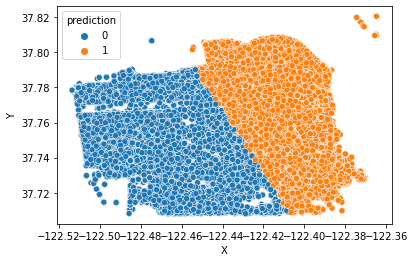

In [0]:
sns.scatterplot(data = transformed_k2, x = "X", y = "Y", hue = "prediction")
plt.show()

In [0]:
kmeans_3 = KMeans(k = 3, seed = 3)
model_k3 = kmeans_3.fit(crime_cluster.select("features"))

transformed_k3 = model_k3.transform(crime_cluster)
transformed_k3.show()


+-----------+---------+--------------------+----------+
|          X|        Y|            features|prediction|
+-----------+---------+--------------------+----------+
| -122.42822|37.781895|[-122.42822265625...|         0|
|-122.410675| 37.79979|[-122.41067504882...|         0|
| -122.45823| 37.74136|[-122.45822906494...|         1|
|-122.459175|  37.7082|[-122.45917510986...|         1|
|-122.386665|37.789883|[-122.38666534423...|         0|
| -122.40753| 37.72329|[-122.40753173828...|         2|
| -122.38854| 37.72879|[-122.38854217529...|         2|
| -122.41905|37.758633|[-122.41905212402...|         0|
| -122.43196|37.764935|[-122.43196105957...|         0|
|-122.431854| 37.77485|[-122.43185424804...|         0|
|-122.433624| 37.80027|[-122.43362426757...|         0|
| -122.41967| 37.76505|[-122.41967010498...|         0|
| -122.47631|37.782402|[-122.47631072998...|         1|
| -122.41689|37.784286|[-122.41689300537...|         0|
| -122.42069|37.781483|[-122.42069244384...|    

In [0]:
transformed_k3 = transformed_k3.toPandas()

/databricks/spark/python/pyspark/sql/pandas/conversion.py:92: UserWarning: toPandas attempted Arrow optimization because 'spark.sql.execution.arrow.pyspark.enabled' is set to true; however, failed by the reason below:
  Unable to convert the field features. If this column is not necessary, you may consider dropping it or converting to primitive type before the conversion.
Direct cause: Unsupported type in conversion to Arrow: VectorUDT
Attempting non-optimization as 'spark.sql.execution.arrow.pyspark.fallback.enabled' is set to true.
  warnings.warn(msg)


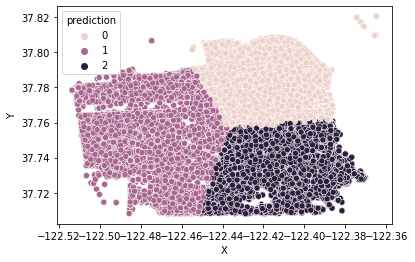

In [0]:
sns.scatterplot(data = transformed_k3, x = "X", y = "Y", hue = "prediction")
plt.show()

In [0]:
kmeans_5 = KMeans(k = 5, seed = 5)
model_k5 = kmeans_5.fit(crime_cluster.select("features"))

transformed_k5 = model_k5.transform(crime_cluster)
transformed_k5.show()


+-----------+---------+--------------------+----------+
|          X|        Y|            features|prediction|
+-----------+---------+--------------------+----------+
| -122.42822|37.781895|[-122.42822265625...|         4|
|-122.410675| 37.79979|[-122.41067504882...|         2|
| -122.45823| 37.74136|[-122.45822906494...|         1|
|-122.459175|  37.7082|[-122.45917510986...|         1|
|-122.386665|37.789883|[-122.38666534423...|         2|
| -122.40753| 37.72329|[-122.40753173828...|         3|
| -122.38854| 37.72879|[-122.38854217529...|         3|
| -122.41905|37.758633|[-122.41905212402...|         0|
| -122.43196|37.764935|[-122.43196105957...|         0|
|-122.431854| 37.77485|[-122.43185424804...|         4|
|-122.433624| 37.80027|[-122.43362426757...|         4|
| -122.41967| 37.76505|[-122.41967010498...|         0|
| -122.47631|37.782402|[-122.47631072998...|         4|
| -122.41689|37.784286|[-122.41689300537...|         2|
| -122.42069|37.781483|[-122.42069244384...|    

In [0]:
transformed_k5 = transformed_k5.toPandas()

/databricks/spark/python/pyspark/sql/pandas/conversion.py:92: UserWarning: toPandas attempted Arrow optimization because 'spark.sql.execution.arrow.pyspark.enabled' is set to true; however, failed by the reason below:
  Unable to convert the field features. If this column is not necessary, you may consider dropping it or converting to primitive type before the conversion.
Direct cause: Unsupported type in conversion to Arrow: VectorUDT
Attempting non-optimization as 'spark.sql.execution.arrow.pyspark.fallback.enabled' is set to true.
  warnings.warn(msg)


/databricks/python/lib/python3.8/site-packages/IPython/core/pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


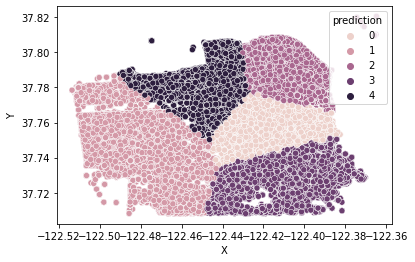

In [0]:
sns.scatterplot(data = transformed_k5, x = "X", y = "Y", hue = "prediction")
plt.show()